# Import Libraries

In [64]:
import pandas as pd

import pip
pip.main(["install", "openpyxl"])

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
import gmaps 

#Google developer API key
#import sys
#sys.path.append('config.py')
#path = '/Group4_Project1_repo/config_1'
#if path not in sys.path:
   # sys.path.append(path)
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


West Midlands crime data has already been merged (see 'data story so far.docx'). Read CSV and see dataframe.

In [3]:
data = pd.read_csv("reduced_2019.csv")

data_df = data

data_df.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5


# Cleaning data

Viewing shape and contents of data.

In [4]:
data_df.shape

(296032, 17)

In [12]:
data_df.columns

Index(['Crime ID', 'Crime type', 'Last outcome category', 'Month', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name',
       'District code (2019)', 'District name (2019)', 'Description',
       'Population', 'Index of Multiple Deprivation (IMD)',
       'Income deprivation- Average score ',
       'Income deprivation - Rank of average score ',
       'Income - Rank of proportion of LSOAs in most deprived 10% nationally '],
      dtype='object')

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296032 entries, 0 to 296031
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Crime ID                                                               259543 non-null  object 
 1   Crime type                                                             296032 non-null  object 
 2   Last outcome category                                                  259543 non-null  object 
 3   Month                                                                  296032 non-null  object 
 4   Longitude                                                              296032 non-null  float64
 5   Latitude                                                               296032 non-null  float64
 6   Location                                                               29603

In [6]:
data_df.duplicated()
boolean_series_of_duplicates = data_df.duplicated()
len(data_df.loc[boolean_series_of_duplicates, :])

8649

In [7]:
data_df.loc[boolean_series_of_duplicates, :]

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
67,NaN,Anti-social behaviour,NaN,2019-07,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,5,0.222,7,5
68,NaN,Anti-social behaviour,NaN,2019-07,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,5,0.222,7,5
159,NaN,Anti-social behaviour,NaN,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,6,0.222,7,5
160,NaN,Anti-social behaviour,NaN,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,6,0.222,7,5
199,NaN,Anti-social behaviour,NaN,2019-07,-1.843092,52.602471,On or near Moore Close,E01009433,Birmingham 001D,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,9,0.222,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295786,NaN,Anti-social behaviour,NaN,2019-02,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14
295788,NaN,Anti-social behaviour,NaN,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14
295789,NaN,Anti-social behaviour,NaN,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14
295818,NaN,Anti-social behaviour,NaN,2019-06,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14


We investigated the duplicates and found that the abive number was the number of crime IDs that had null values in similar locations. They also tended to fall into the crime type of anti-social behaviour. 

In [8]:
data_df.isnull().sum()

Crime ID                                                                 36489
Crime type                                                                   0
Last outcome category                                                    36489
Month                                                                        0
Longitude                                                                    0
Latitude                                                                     0
Location                                                                     0
LSOA code                                                                    0
LSOA name                                                                    0
District code (2019)                                                         0
District name (2019)                                                         0
Description                                                                  0
Population                                          

The last outcome column shows many null values, we have decided to change this to 'No outcome recorded' rather than leave it blank.

In [9]:
# Fill in missing values in 'last outcome category'
data_df["Last outcome category"] = data_df["Last outcome category"].fillna('No outcome recorded')

## Filter West Midlands data

We only want the data for the follwing districts: Birmingham, Coventry, Dudley, Sandwell, Solihull, Walsall, Wolverhampton. We will then filter this data into a new West_Midlands_df

In [10]:
West_midlands_df = data_df[(data_df["District name (2019)"]=="Birmingham")|(data_df["District name (2019)"]=="Coventry")|(data_df["District name (2019)"]=="Dudley")|(data_df["District name (2019)"]=="Sandwell")|(data_df["District name (2019)"]=="Solihull")|(data_df["District name (2019)"]=="Walsall")|(data_df["District name (2019)"]=="Wolverhampton")]

West_midlands_df.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5


In [11]:
West_midlands_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295541 entries, 0 to 295871
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Crime ID                                                               259087 non-null  object 
 1   Crime type                                                             295541 non-null  object 
 2   Last outcome category                                                  295541 non-null  object 
 3   Month                                                                  295541 non-null  object 
 4   Longitude                                                              295541 non-null  float64
 5   Latitude                                                               295541 non-null  float64
 6   Location                                                               29554

In [ ]:
#The Crime ID column shows many null values, we have decided to change this to 'No ID recorded' rather than leave it blank.

In [12]:
# Fill in missing values in 'Crime ID'
West_midlands_df["Crime ID"] = West_midlands_df["Crime ID"].fillna('No ID recorded')

C:\Users\gcwhi\AppData\Local\Temp/ipykernel_31316/3972491802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  West_midlands_df["Crime ID"] = West_midlands_df["Crime ID"].fillna('No ID recorded')


In [13]:
West_midlands_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295541 entries, 0 to 295871
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Crime ID                                                               295541 non-null  object 
 1   Crime type                                                             295541 non-null  object 
 2   Last outcome category                                                  295541 non-null  object 
 3   Month                                                                  295541 non-null  object 
 4   Longitude                                                              295541 non-null  float64
 5   Latitude                                                               295541 non-null  float64
 6   Location                                                               29554

In [14]:
West_midlands_df.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5


In [15]:
West_midlands_df.to_csv('clean_2019.csv', index=False)

We have local income deprivation data in an excel file which we need to read in:

In [16]:
lidd = pd.read_excel("localincomedeprivationdata.xlsx", engine='openpyxl')

In [17]:
lidd.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031338,Adur 002A,E07000223,Adur,5.518,30006,10,0.054,25262,8,1159,202,603,354,618
1,E01031339,Adur 002B,E07000223,Adur,6.186,29228,9,0.052,25709,8,1200,229,653,318,664
2,E01031340,Adur 002C,E07000223,Adur,5.213,30309,10,0.027,31386,10,1464,241,691,532,707
3,E01031341,Adur 008A,E07000223,Adur,38.777,4639,2,0.237,4645,2,1371,239,775,357,785
4,E01031342,Adur 008B,E07000223,Adur,16.050,17896,6,0.083,19015,6,1731,235,760,736,768


Renaming columns

In [18]:
lidd = lidd.rename(columns={"Overall Index of Multiple Deprivation (IMD) Score":"LSOA IMD Score"})

In [19]:
lidd = lidd.rename(columns={"Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)":"LSOA IMD Rank"})

In [20]:
lidd = lidd.rename(columns={"Income Rank (where 1 is most deprived)":"LSOA Income Rank"})

In [28]:
del lidd['LSOA name (2011)']
del lidd['Local Authority District code (2019)']
del lidd['Local Authority District name (2019)']
del lidd['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']
del lidd['Income Score (rate)']
del lidd['Income Decile (where 1 is most deprived 10% of LSOAs)']
del lidd['Total population: mid 2015 (excluding prisoners)']
del lidd['Dependent Children aged 0-15: mid 2015 (excluding prisoners)']
del lidd['Population aged 16-59: mid 2015 (excluding prisoners)']
del lidd['Older population aged 60 and over: mid 2015 (excluding prisoners)']
del lidd['Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners) ']

In [21]:
lidd.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),LSOA IMD Score,LSOA IMD Rank,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),LSOA Income Rank,Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031338,Adur 002A,E07000223,Adur,5.518,30006,10,0.054,25262,8,1159,202,603,354,618
1,E01031339,Adur 002B,E07000223,Adur,6.186,29228,9,0.052,25709,8,1200,229,653,318,664
2,E01031340,Adur 002C,E07000223,Adur,5.213,30309,10,0.027,31386,10,1464,241,691,532,707
3,E01031341,Adur 008A,E07000223,Adur,38.777,4639,2,0.237,4645,2,1371,239,775,357,785
4,E01031342,Adur 008B,E07000223,Adur,16.050,17896,6,0.083,19015,6,1731,235,760,736,768


In [22]:
lidd = lidd.rename(columns={"LSOA code (2011)":"LSOA code"})
lidd.head()

,LSOA code,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),LSOA IMD Score,LSOA IMD Rank,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),LSOA Income Rank,Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031338,Adur 002A,E07000223,Adur,5.518,30006,10,0.054,25262,8,1159,202,603,354,618
1,E01031339,Adur 002B,E07000223,Adur,6.186,29228,9,0.052,25709,8,1200,229,653,318,664
2,E01031340,Adur 002C,E07000223,Adur,5.213,30309,10,0.027,31386,10,1464,241,691,532,707
3,E01031341,Adur 008A,E07000223,Adur,38.777,4639,2,0.237,4645,2,1371,239,775,357,785
4,E01031342,Adur 008B,E07000223,Adur,16.050,17896,6,0.083,19015,6,1731,235,760,736,768


Reading in LSSOA geographical boundary data for local level data analysis.

In [23]:
llso_lat_long_df = pd.read_csv("Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3.csv")

llso_lat_long_df.head()

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Area,Shape__Length
0,1,E01000001,City of London 001A,532123,181632,-0.097140,51.5182,2635.767993,129865.31440,2635.767993
1,2,E01000002,City of London 001B,532480,181715,-0.091970,51.5188,2707.881853,228419.63470,2707.881853
2,3,E01000003,City of London 001C,532239,182033,-0.095320,51.5217,1224.638192,59054.35193,1224.638192
3,4,E01000005,City of London 001E,533581,181283,-0.076270,51.5147,2275.805348,189577.71070,2275.805348
4,5,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.5387,1966.092607,146536.99580,1966.092607


In [24]:
llso_lat_long_df1 = llso_lat_long_df.rename(columns={"LSOA11CD":"LSOA code"})

In [25]:
lidd_1 = pd.merge(lidd,llso_lat_long_df1 , on = "LSOA code")
lidd_1.head()

,LSOA code,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),LSOA IMD Score,LSOA IMD Rank,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),LSOA Income Rank,Income Decile (where 1 is most deprived 10% of LSOAs),...,Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),OBJECTID,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Area,Shape__Length
0,E01031338,Adur 002A,E07000223,Adur,5.518,30006,10,0.054,25262,8,...,618,30724,Adur 002A,522873,106280,-0.25613,50.8430,2803.565218,2.903922e+05,2803.565218
1,E01031339,Adur 002B,E07000223,Adur,6.186,29228,9,0.052,25709,8,...,664,30725,Adur 002B,521513,106276,-0.27544,50.8433,3304.101168,2.372498e+05,3304.101168
2,E01031340,Adur 002C,E07000223,Adur,5.213,30309,10,0.027,31386,10,...,707,30726,Adur 002C,521356,107545,-0.27725,50.8547,14809.437400,4.638509e+06,14809.437400
3,E01031341,Adur 008A,E07000223,Adur,38.777,4639,2,0.237,4645,2,...,785,30727,Adur 008A,517645,104245,-0.33100,50.8258,4057.474048,3.175876e+05,4057.474048
4,E01031342,Adur 008B,E07000223,Adur,16.050,17896,6,0.083,19015,6,...,768,30728,Adur 008B,517688,103903,-0.33050,50.8227,4818.583756,5.457805e+05,4818.583756


Deleting columns not needed.

In [26]:
del lidd_1['OBJECTID']
del lidd_1['LSOA11NM']
del lidd_1['BNG_E']
del lidd_1['BNG_N']
del lidd_1['Shape_Leng']
del lidd_1['Shape__Area']
del lidd_1['Shape__Length']

Create new dataframe that merges West Midlands Data to LSOA data.

In [27]:
West_midlands_df1 = pd.merge(West_midlands_df, lidd_1, on = "LSOA code")
West_midlands_df1.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),...,Income Score (rate),LSOA Income Rank,Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),LONG_,LAT
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,...,0.088,18278,6,1529,324,809,396,804,-1.84982,52.5918
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,...,0.088,18278,6,1529,324,809,396,804,-1.84982,52.5918
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,...,0.088,18278,6,1529,324,809,396,804,-1.84982,52.5918
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,...,0.088,18278,6,1529,324,809,396,804,-1.84982,52.5918
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,...,0.088,18278,6,1529,324,809,396,804,-1.84982,52.5918


In [28]:
West_midlands_df1.columns

Index(['Crime ID', 'Crime type', 'Last outcome category', 'Month', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name',
       'District code (2019)', 'District name (2019)', 'Description',
       'Population', 'Index of Multiple Deprivation (IMD)',
       'Income deprivation- Average score ',
       'Income deprivation - Rank of average score ',
       'Income - Rank of proportion of LSOAs in most deprived 10% nationally ',
       'LSOA name (2011)', 'Local Authority District code (2019)',
       'Local Authority District name (2019)', 'LSOA IMD Score',
       'LSOA IMD Rank',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Score (rate)', 'LSOA Income Rank',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Total population: mid 2015 (excluding prisoners)',
       'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
       'Population aged 16-59: mid 2015 (excluding prisoners)

One last check for null values and duplicates. 

In [29]:
West_midlands_df1.isnull().sum()

Crime ID                                                                                              0
Crime type                                                                                            0
Last outcome category                                                                                 0
Month                                                                                                 0
Longitude                                                                                             0
Latitude                                                                                              0
Location                                                                                              0
LSOA code                                                                                             0
LSOA name                                                                                             0
District code (2019)                                            

In [30]:
West_midlands_df1.duplicated()
boolean_series_of_duplicates = West_midlands_df1.duplicated()
len(West_midlands_df1.loc[boolean_series_of_duplicates, :])

8644

In [31]:
West_midlands_df1.loc[boolean_series_of_duplicates, :]

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),...,Income Score (rate),LSOA Income Rank,Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),LONG_,LAT
67,No ID recorded,Anti-social behaviour,No outcome recorded,2019-07,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,E08000025,...,0.124,13223,5,1519,312,803,404,788,-1.83760,52.6023
68,No ID recorded,Anti-social behaviour,No outcome recorded,2019-07,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,E08000025,...,0.124,13223,5,1519,312,803,404,788,-1.83760,52.6023
159,No ID recorded,Anti-social behaviour,No outcome recorded,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,...,0.104,15703,5,1384,244,703,437,709,-1.85037,52.5986
160,No ID recorded,Anti-social behaviour,No outcome recorded,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,...,0.104,15703,5,1384,244,703,437,709,-1.85037,52.5986
199,No ID recorded,Anti-social behaviour,No outcome recorded,2019-07,-1.843092,52.602471,On or near Moore Close,E01009433,Birmingham 001D,E08000025,...,0.026,31447,10,1777,310,849,618,875,-1.84502,52.6012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295455,No ID recorded,Anti-social behaviour,No outcome recorded,2019-02,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,...,0.085,18717,6,1688,316,1016,356,1007,-2.15389,52.6059
295457,No ID recorded,Anti-social behaviour,No outcome recorded,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,...,0.085,18717,6,1688,316,1016,356,1007,-2.15389,52.6059
295458,No ID recorded,Anti-social behaviour,No outcome recorded,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,...,0.085,18717,6,1688,316,1016,356,1007,-2.15389,52.6059
295487,No ID recorded,Anti-social behaviour,No outcome recorded,2019-06,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,...,0.085,18717,6,1688,316,1016,356,1007,-2.15389,52.6059


The above confirms that the duplicates 

Export to clean CSV file

In [32]:
West_midlands_df1.to_csv('clean_2019_1.csv', index=False)

# Data Visualisation 

Hypothesis: Within the West Midlands during 2019 the Index of Multiple Deprivation (IMD) Score of an area should influence the exposure to certain crimes in that area.

## Research Question 1: Does the crime data sourced from the West Midlands Police Database correlate with the Index of Multiple Deprivation (IMD) score?

The IMD score is created with 7 domains of deprivation: Income (22.5%), Employment (22.5%), Education (13.5%), Health (13.5%), Crime (9.3%), Barriers to Housing & Services (9.3%), and Living Environment (9.3%). We expect that because crime is one domain used to create the IMD score that the crime rates in the LLSOAs should correlate with the IMD score. 

We also wanted to see if there are any outliers and what this would mean for those LLSOAs.

We will then use this data to establish which areas are exposed to which crimes.

In [ ]:
# Scatter plot - Crime rate VS IMD score 
# Count of number of crimes in LSOA vs LSOA IMD score 

In [33]:
West_midlands_df1["LSOA name"].nunique()

1680

In [34]:
West_midlands_df1["LSOA IMD Rank"].nunique()

1680

In [35]:
West_midlands_df1["LSOA IMD Score"].max()

78.083

In [74]:
West_midlands_df1["LSOA IMD Score"].mean()

36.83598358602774

In [36]:
# Groupby LSOA
f = {"LSOA name": "count", "LSOA IMD Score":'first', "District code (2019)": "first", "Longitude": "first", "Latitude": "first"}
West_midlands_df1.groupby(["LSOA name"], as_index=False).agg(f)

LSOA_crime_count_df = West_midlands_df1.groupby(["LSOA name"]).agg(f)

LSOA_crime_count_df = LSOA_crime_count_df.rename(columns={"LSOA name":"LSOA crime count"})

LSOA_crime_count_df = LSOA_crime_count_df.reset_index()
LSOA_crime_count_df

,LSOA name,LSOA crime count,LSOA IMD Score,District code (2019),Longitude,Latitude
0,Birmingham 001A,27,12.652,E08000025,-1.850519,52.589275
1,Birmingham 001B,76,19.086,E08000025,-1.845780,52.593827
2,Birmingham 001C,65,17.512,E08000025,-1.855043,52.600581
3,Birmingham 001D,58,5.935,E08000025,-1.845148,52.601521
4,Birmingham 002A,59,6.040,E08000025,-1.831860,52.597548
...,...,...,...,...,...,...
1675,Wolverhampton 035D,235,43.265,E08000031,-2.116227,52.561677
1676,Wolverhampton 035E,258,46.113,E08000031,-2.125145,52.574748
1677,Wolverhampton 035F,264,40.812,E08000031,-2.116606,52.576645
1678,Wolverhampton 035G,148,37.888,E08000031,-2.114742,52.574723


In [37]:
LSOA_crime_count_df["LSOA crime count"].max()

4707

In [73]:
LSOA_crime_count_df["LSOA crime count"].mean()

175.91726190476192

In [59]:
# Scatter plot to show results
y_axis = LSOA_crime_count_df["LSOA crime count"]
x_axis = LSOA_crime_count_df["LSOA IMD Score"]


In [88]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
   

The r-value is: 0.023710532323882004


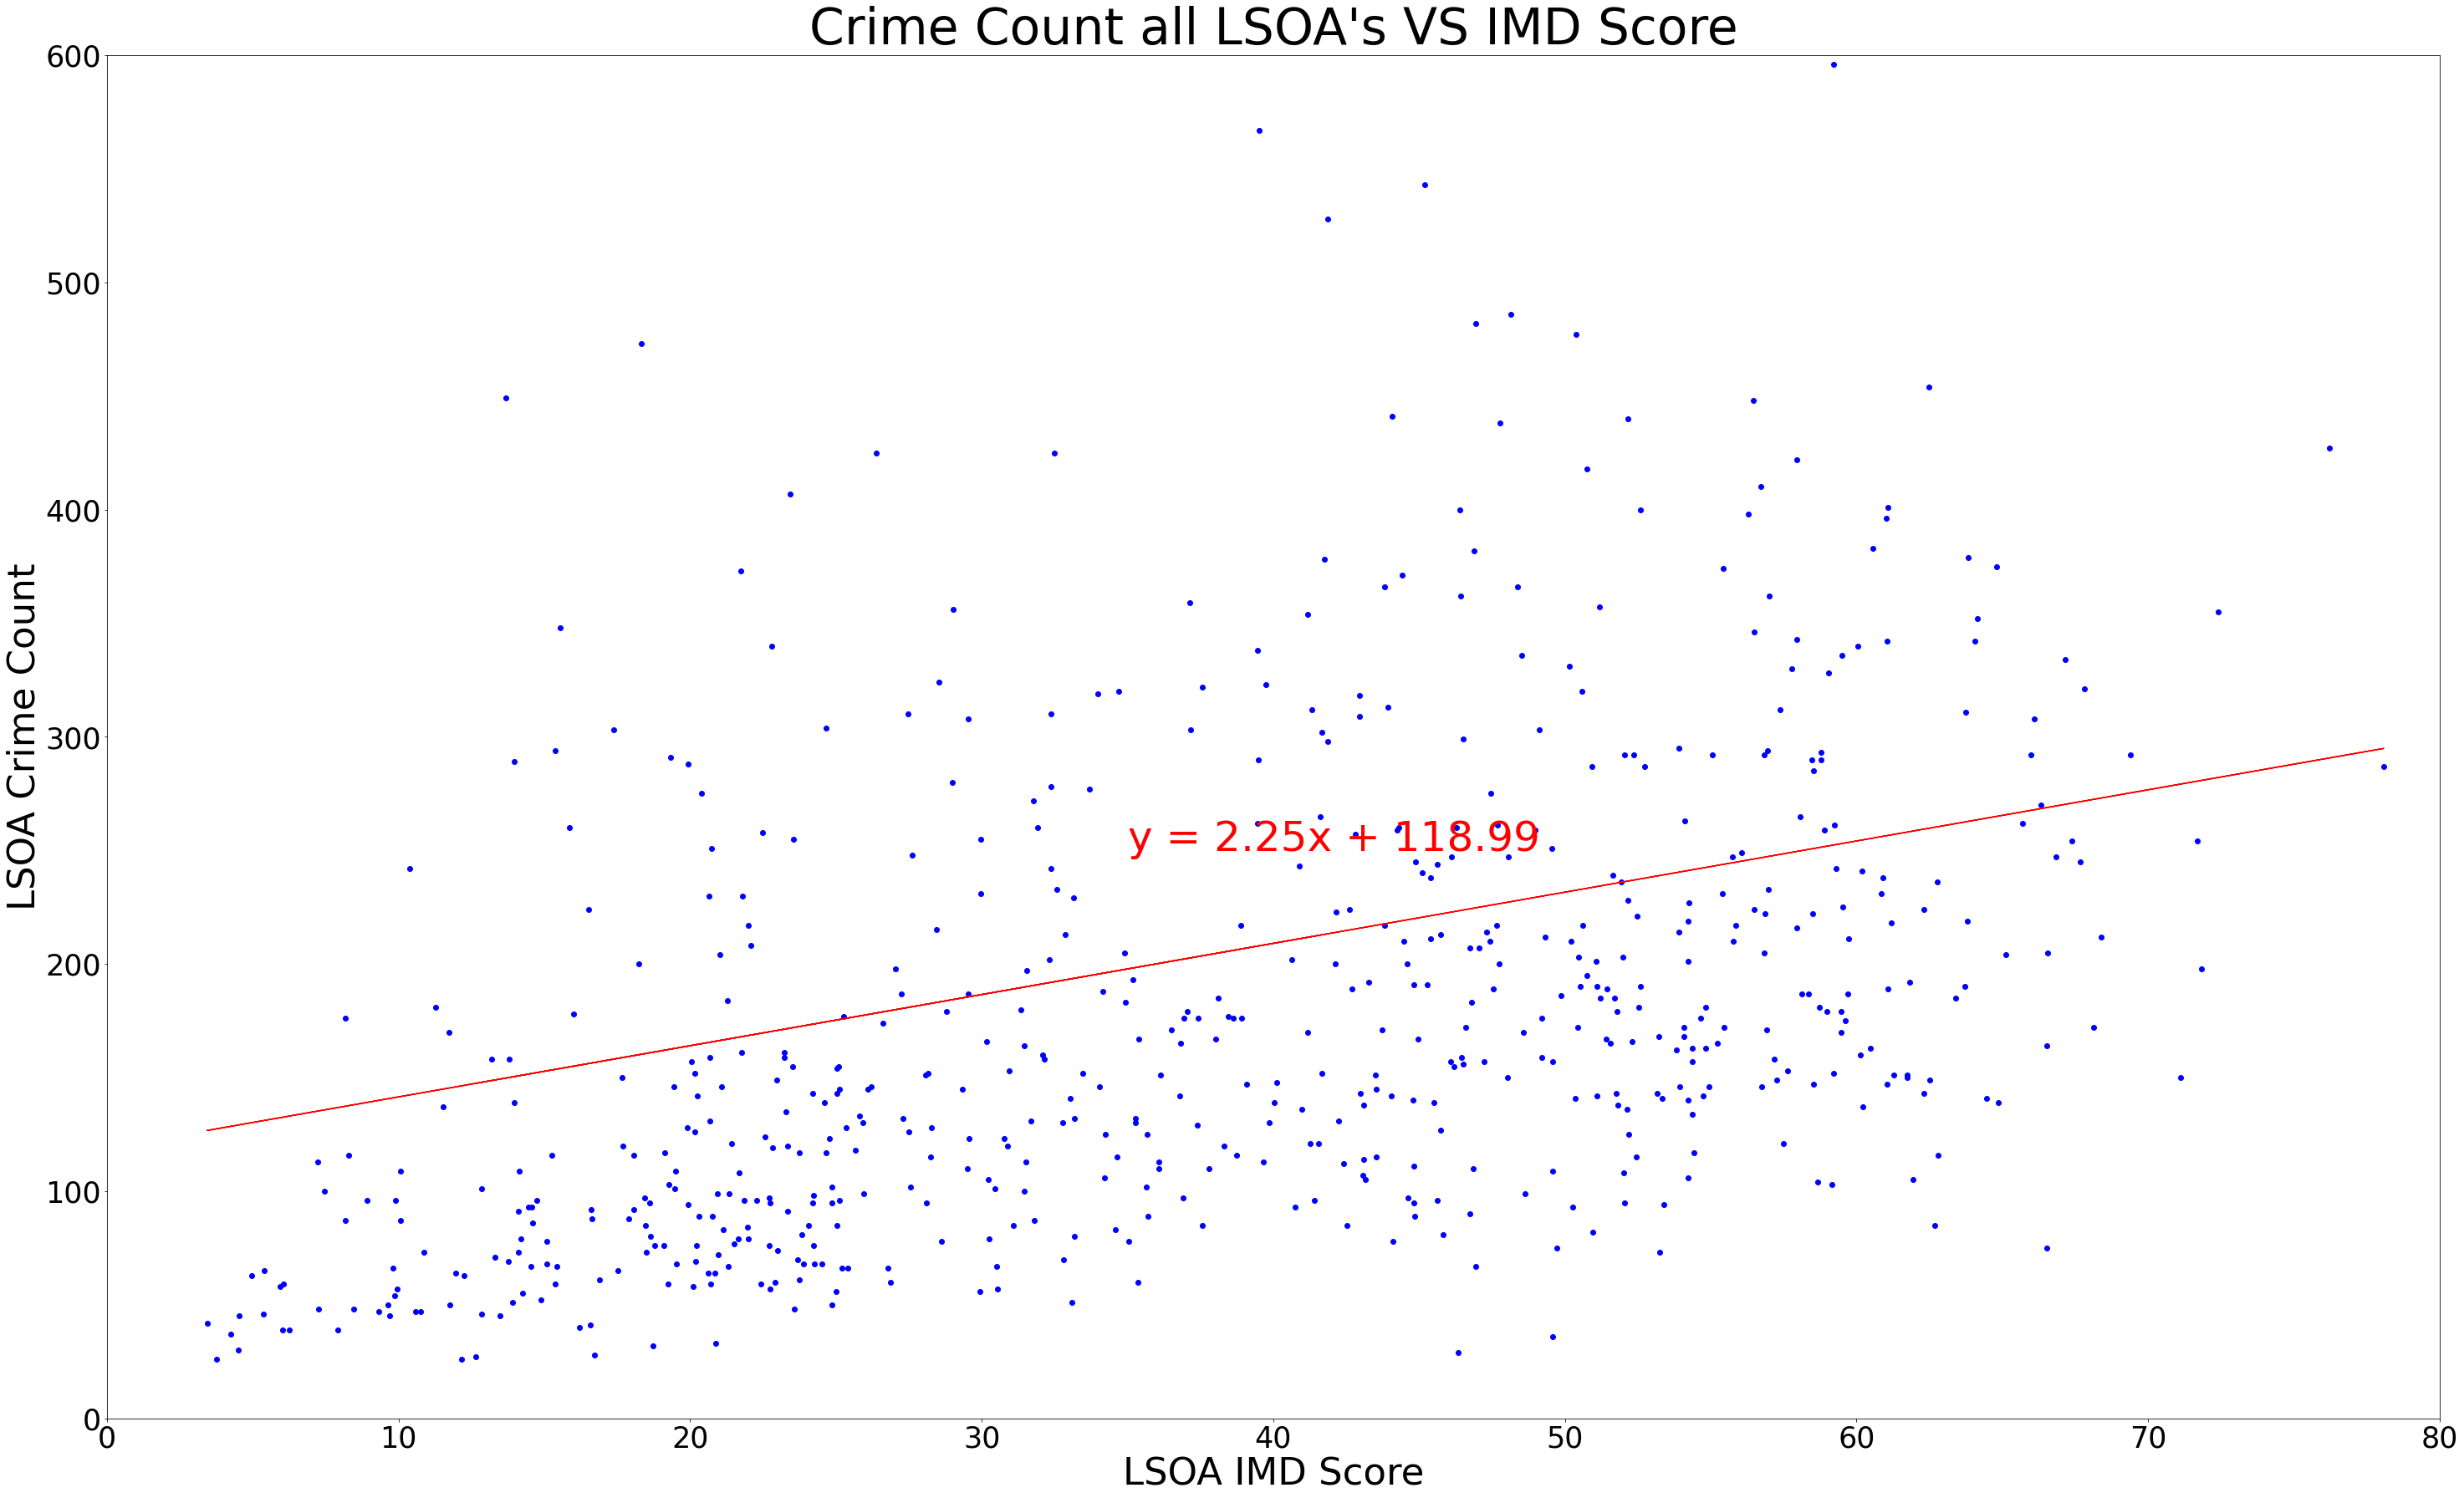

In [95]:


# Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Crime Count all LSOA's VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()

# Get rid of outliers and then linear regression 

A scatter plot was chosen as we are working with a large dataset. 
Analysis: what does this plot show?
Outliers:

In [111]:
# Create local authority District DataFrames
birmingham_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000025")]
coventry_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000026")]
solihull_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000029")]
sandwell_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000028")]
dudley_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000027")]
wolverhampton_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000031")]
walsall_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000030")]



The r-value is: 0.023710532323882004


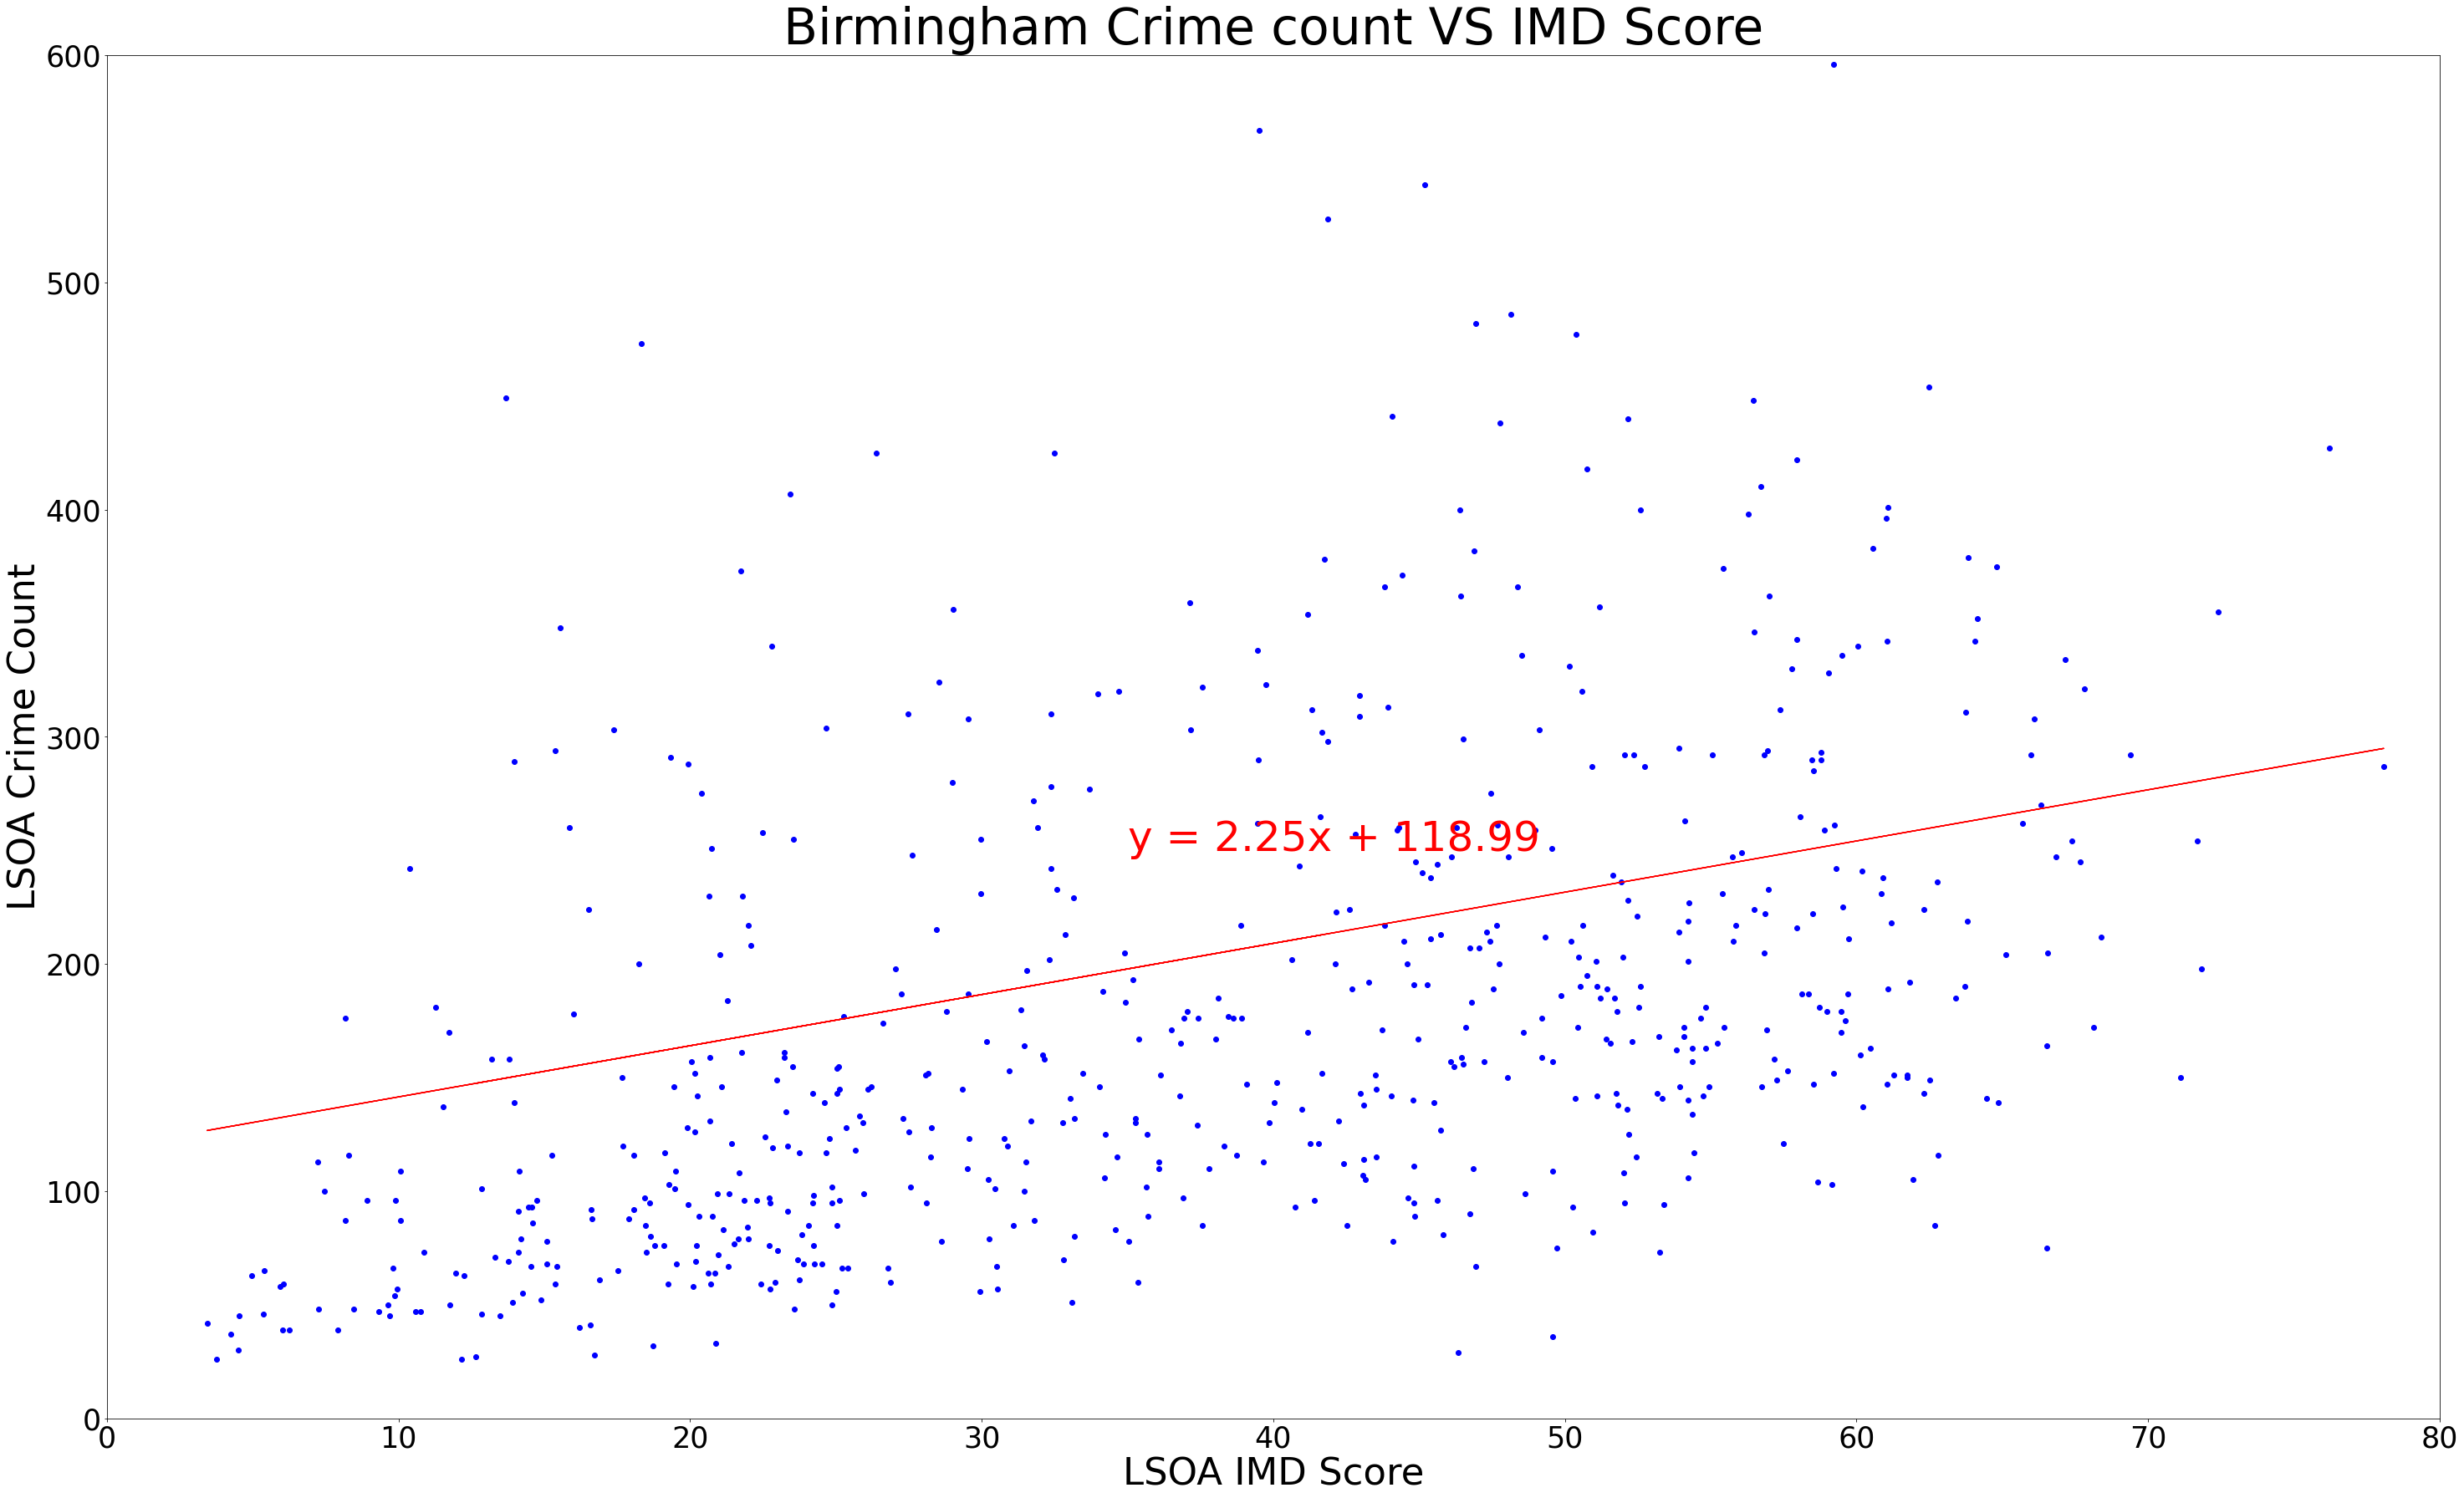

In [96]:
# Scatter plot to show results
y_axis = birmingham_df["LSOA crime count"]
x_axis = birmingham_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()
   
    

The r-value is: 0.0699633659112474


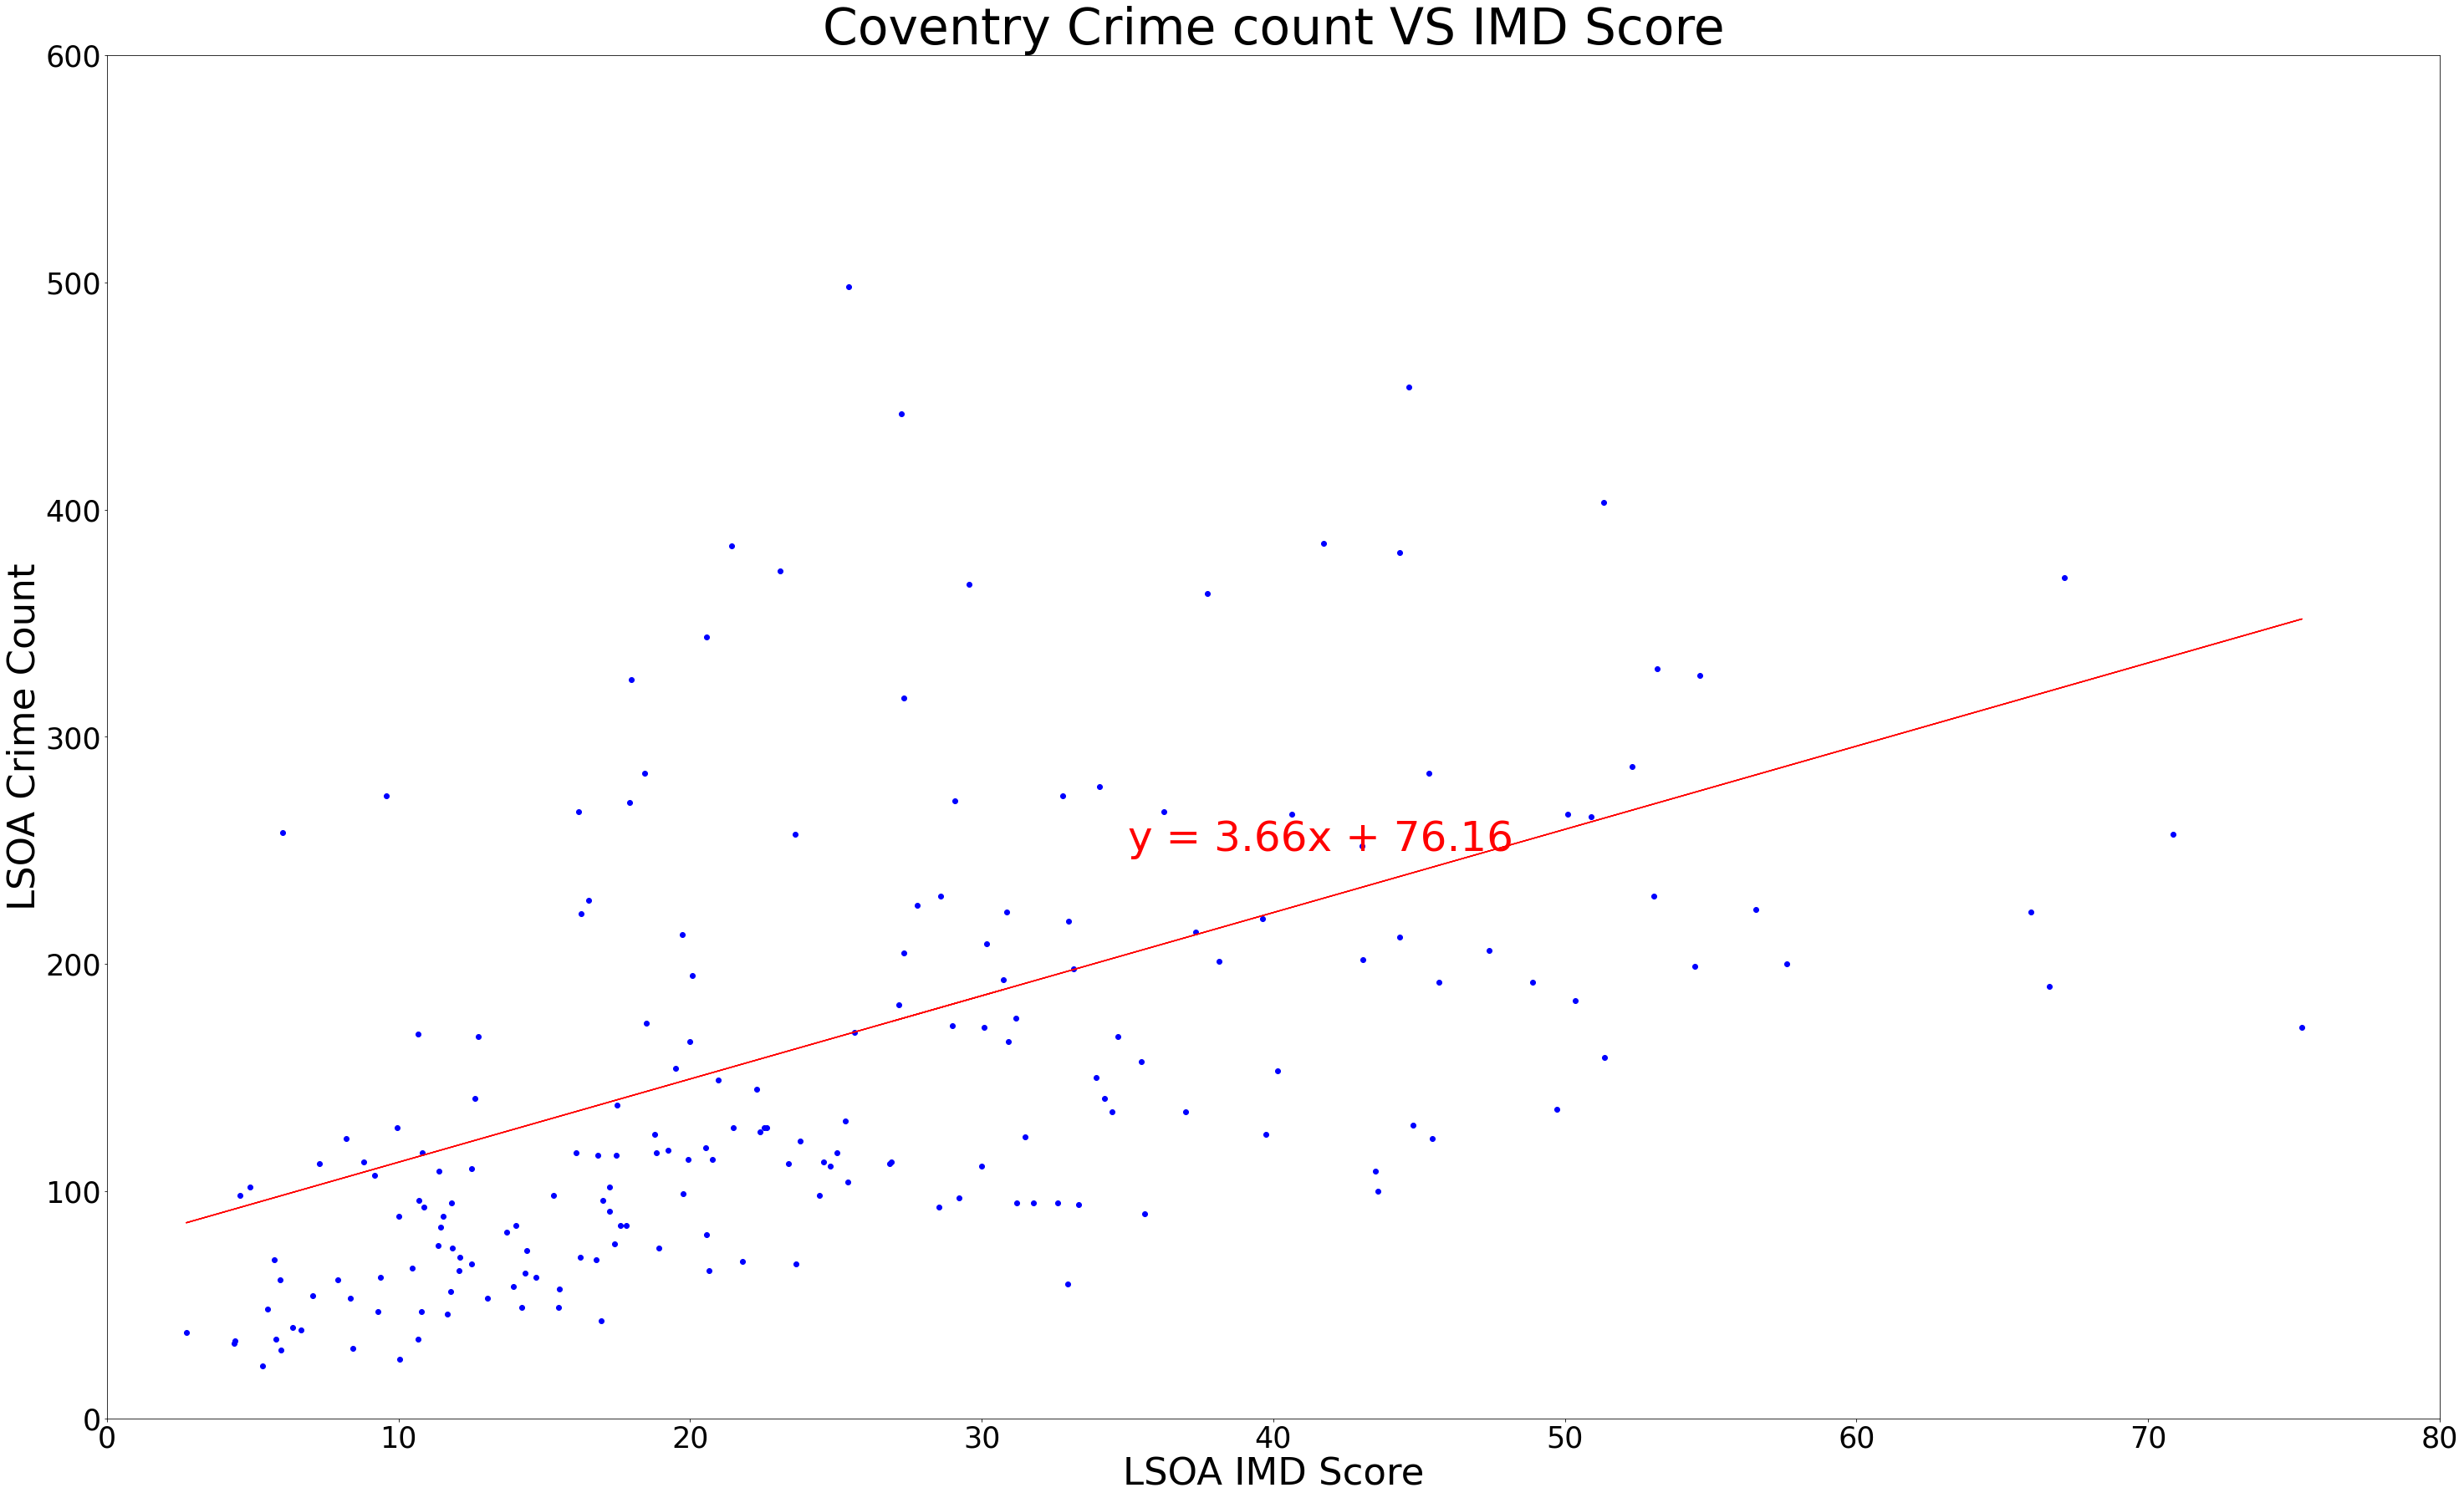

In [97]:
# Scatter plot to show results
y_axis = coventry_df["LSOA crime count"]
x_axis = coventry_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Coventry Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()

The r-value is: 0.0727372106774209


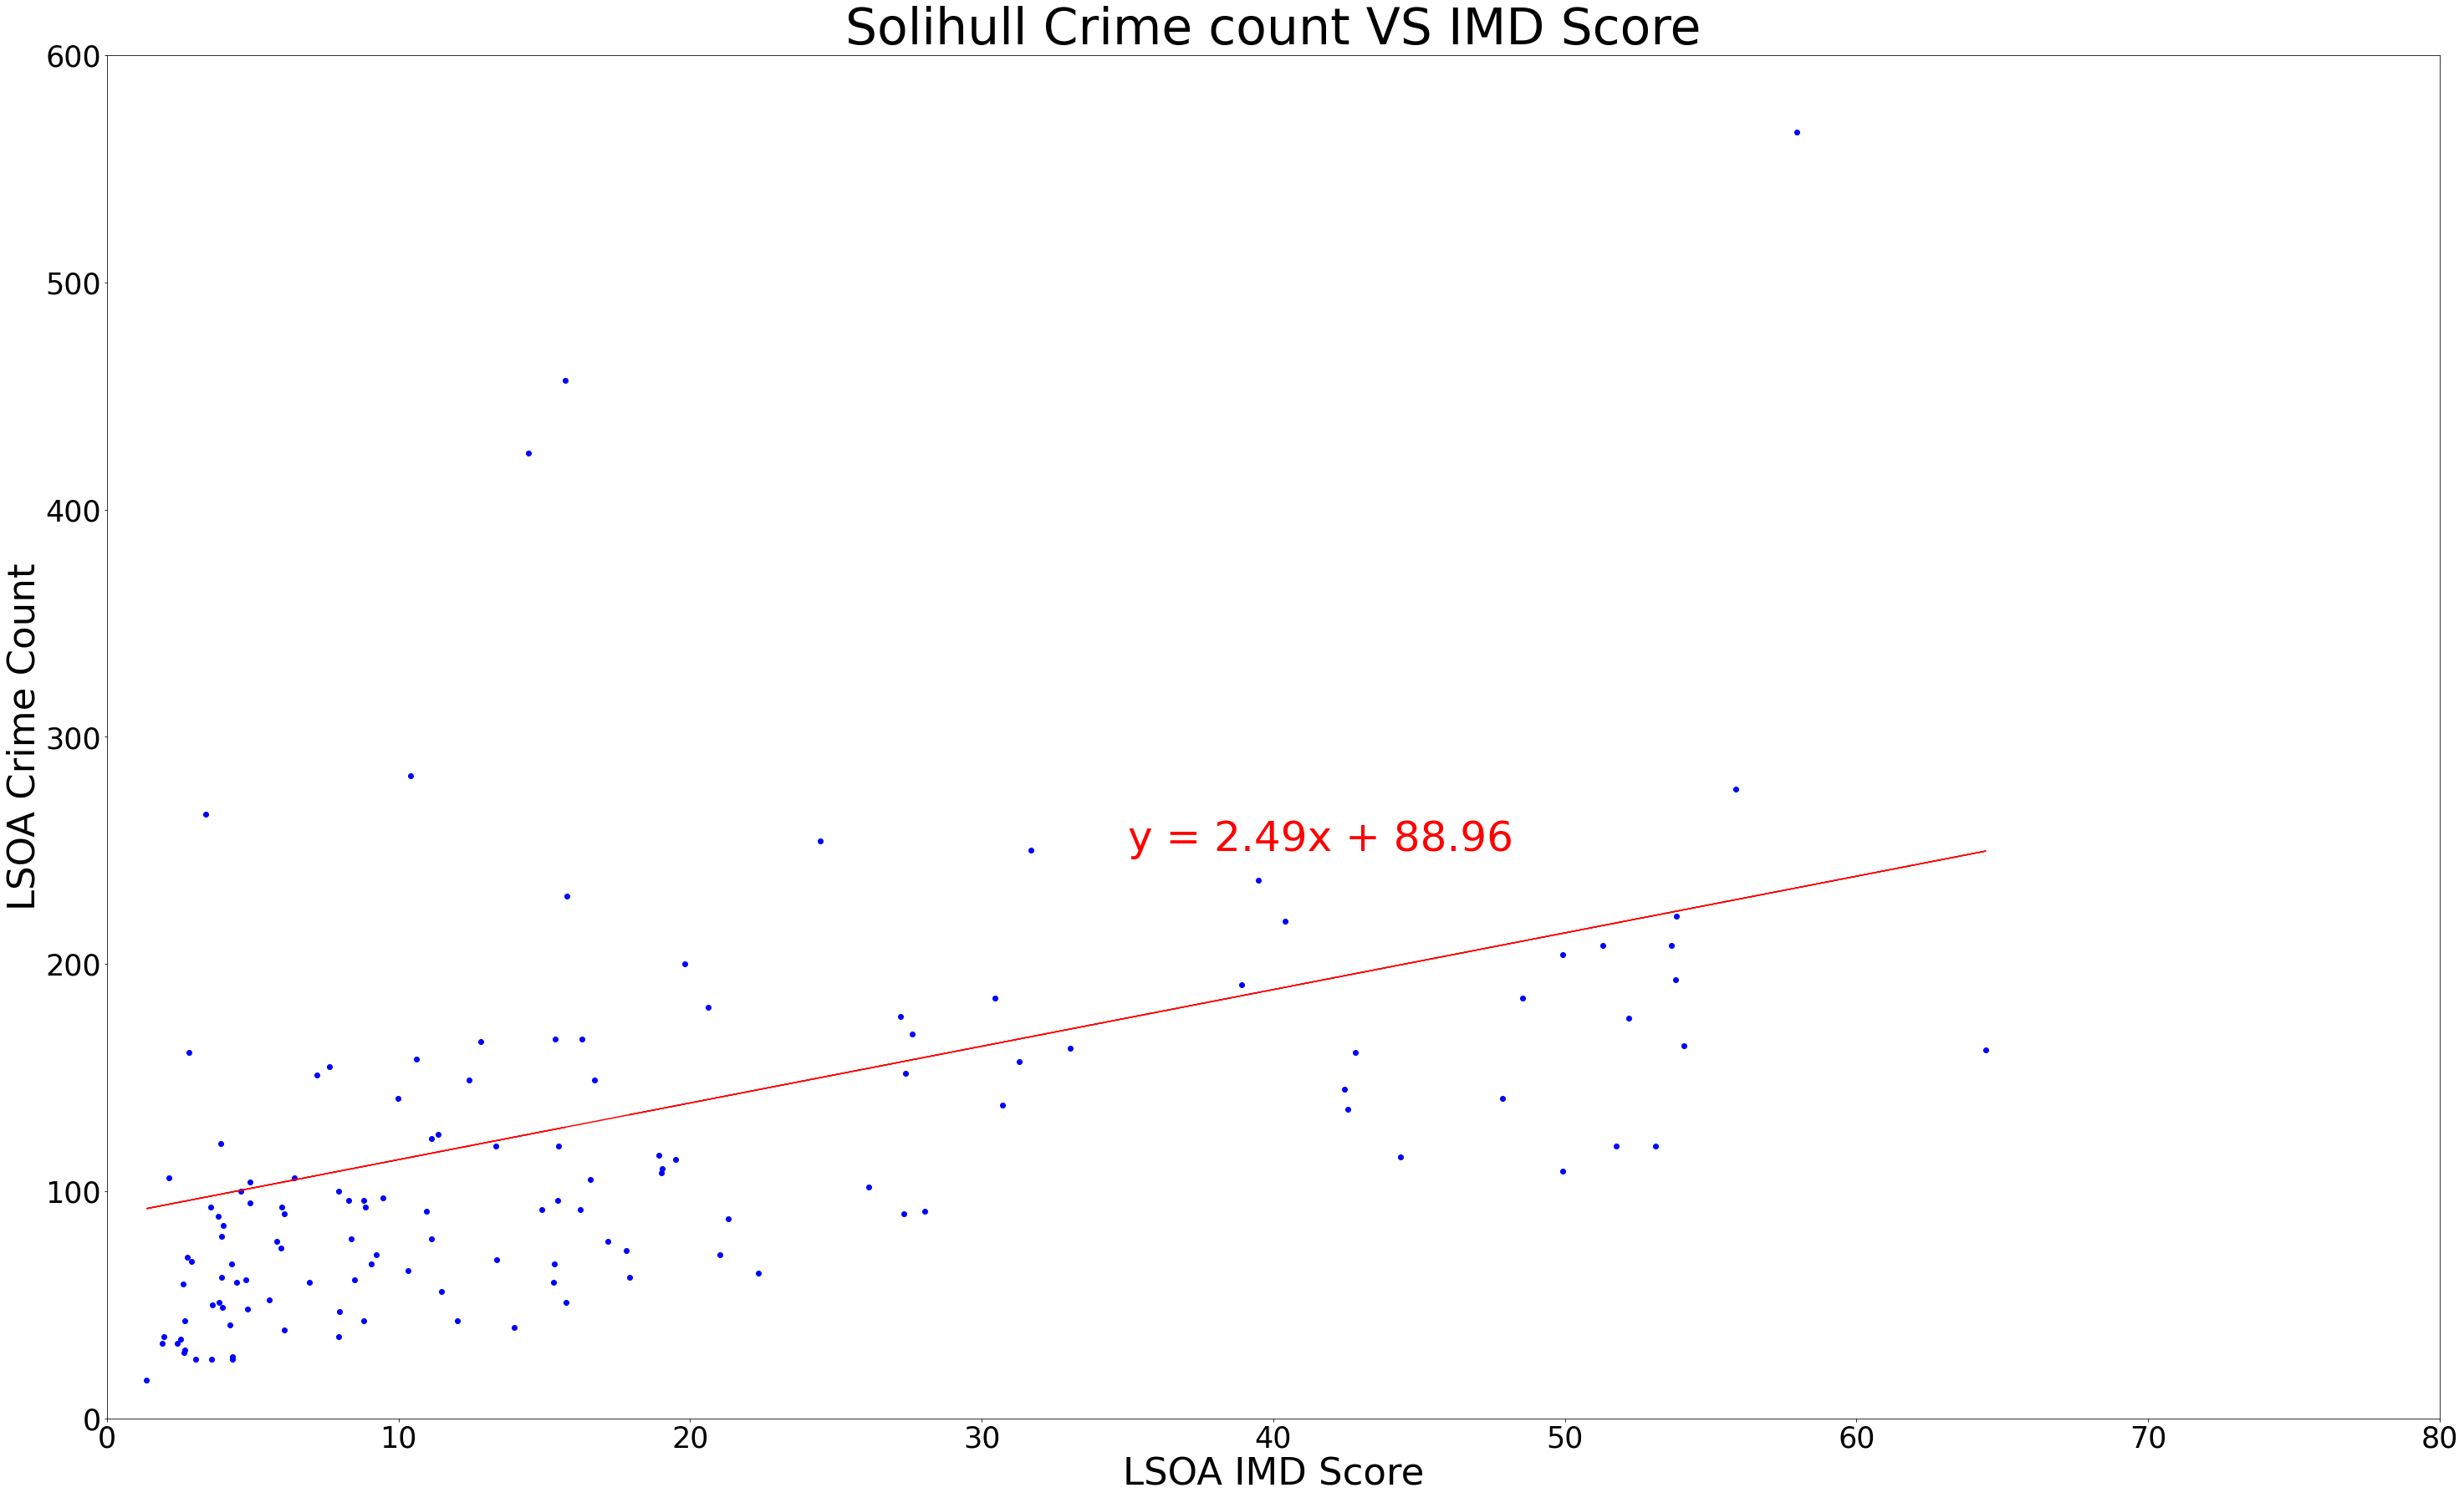

In [98]:
# Scatter plot to show results
y_axis = solihull_df["LSOA crime count"]
x_axis = solihull_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Solihull Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()

The r-value is: 0.12050199683385551


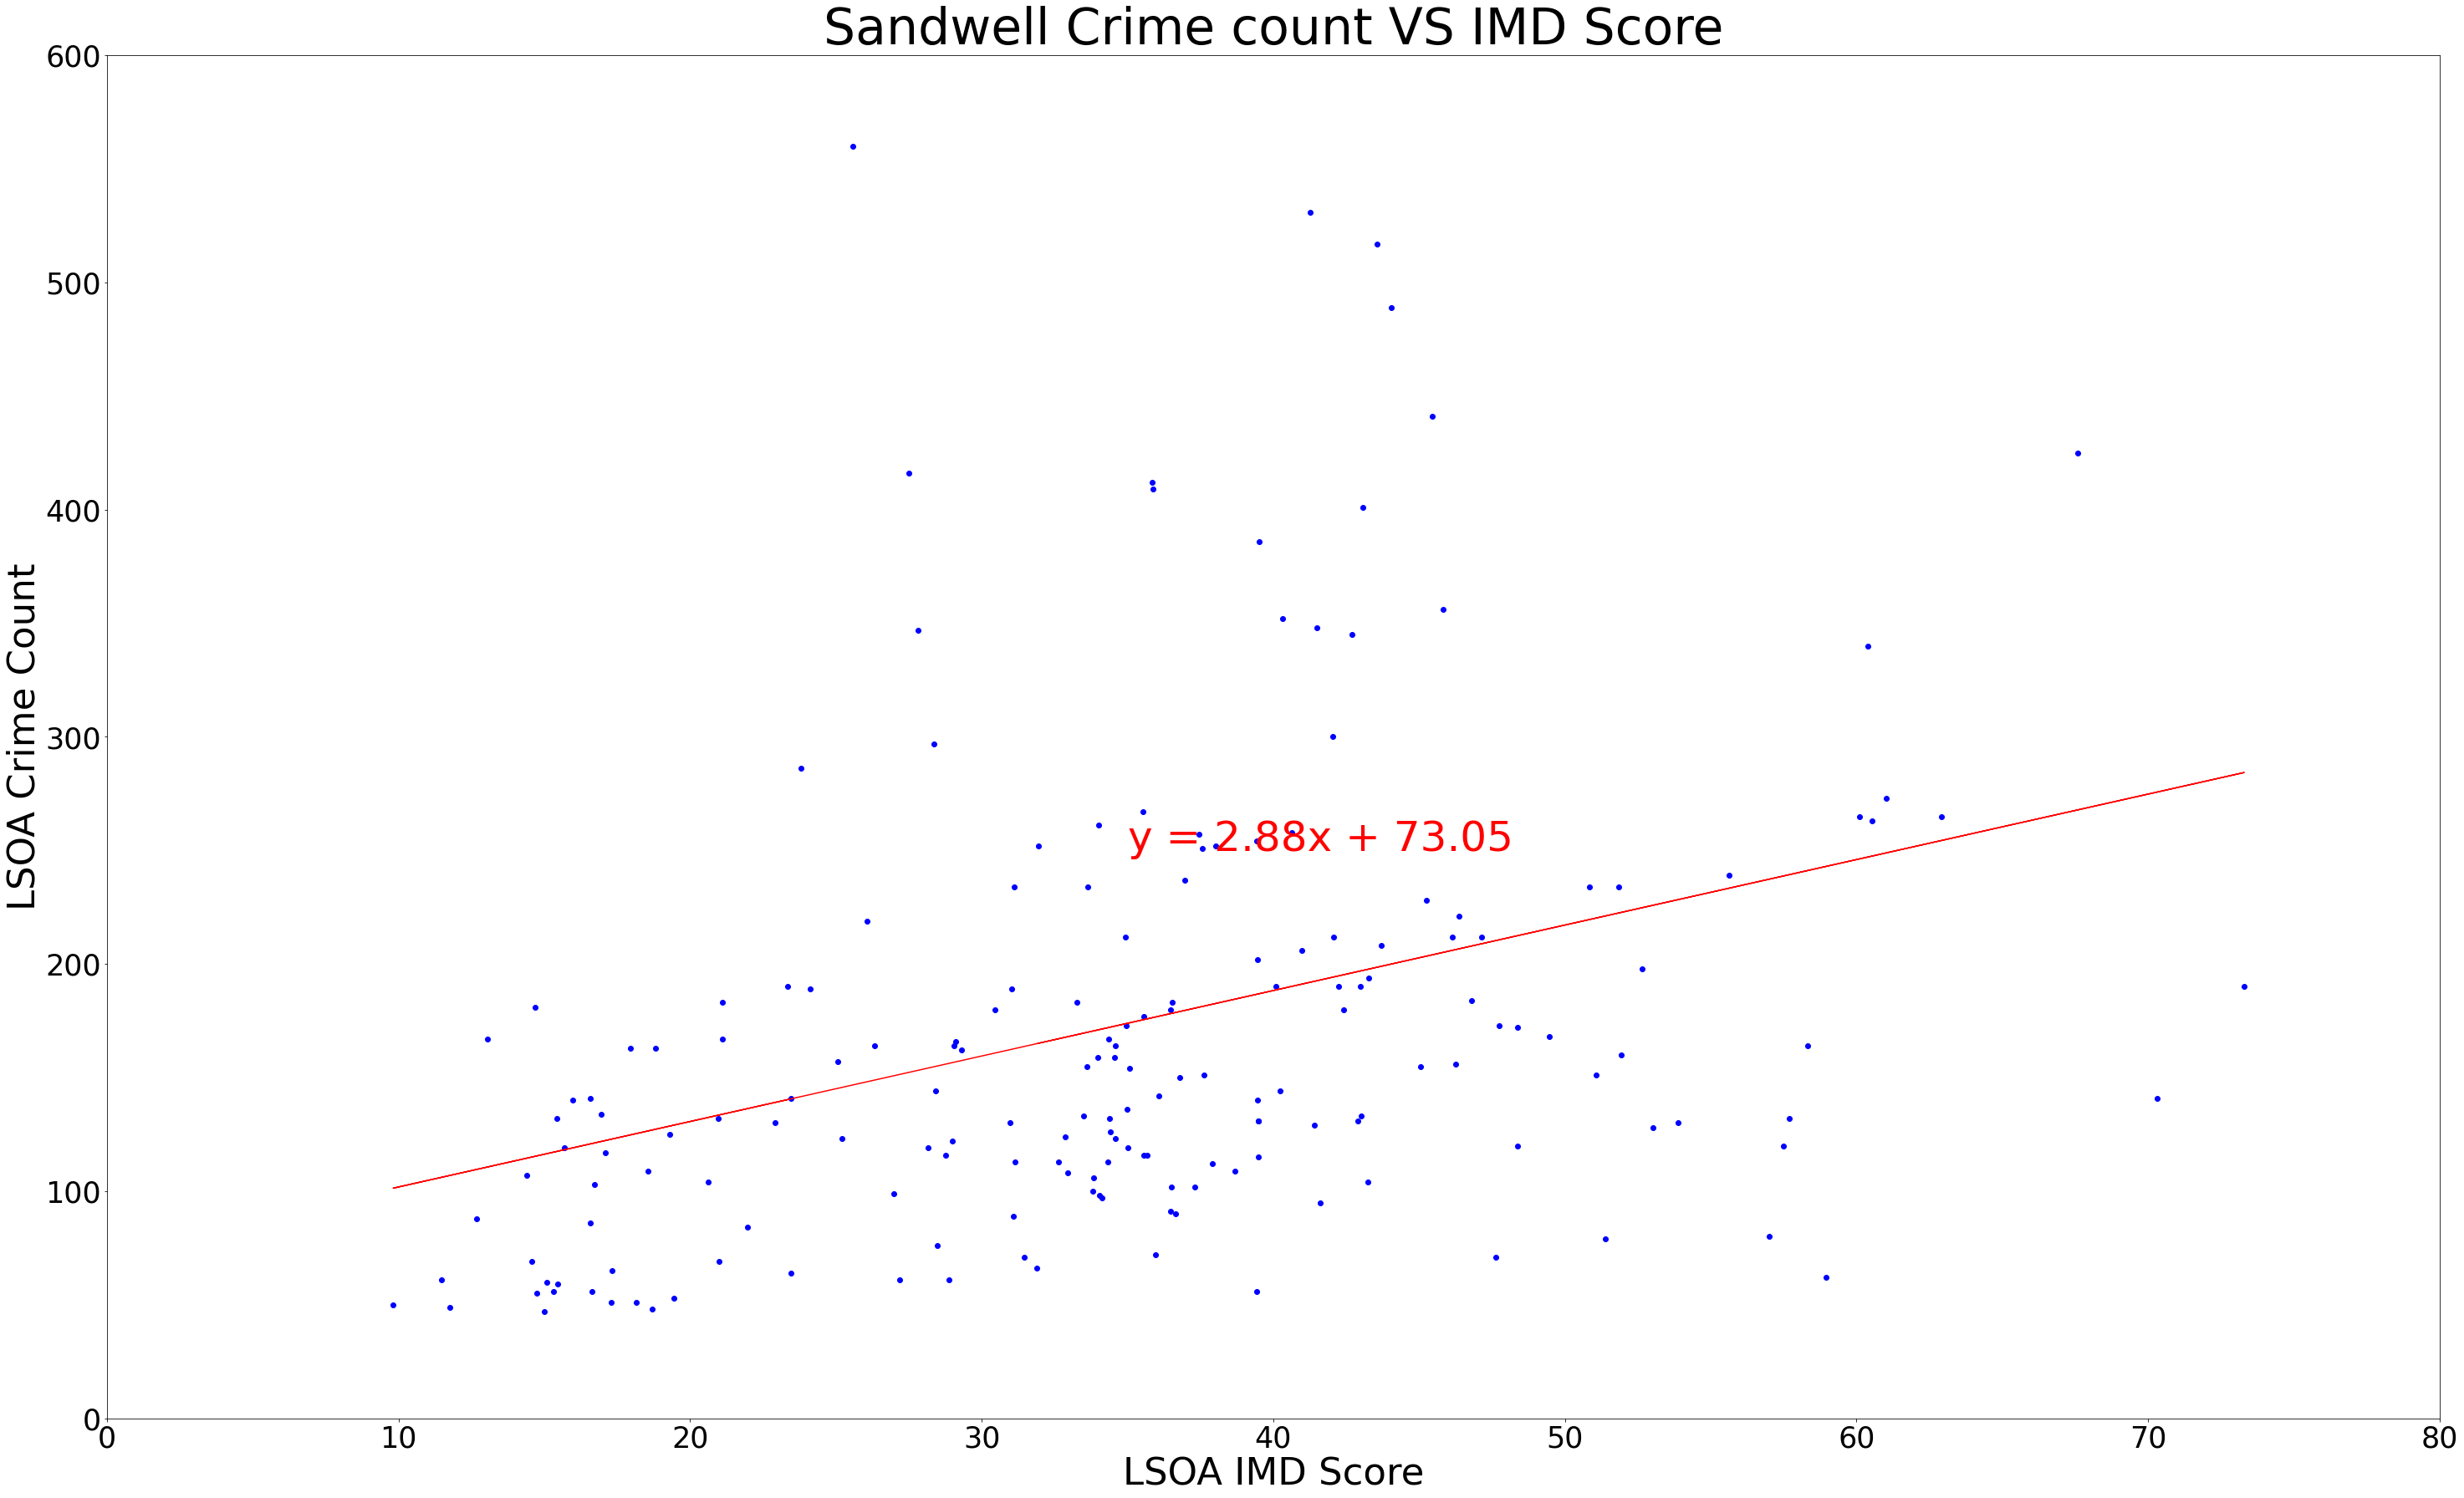

In [99]:
# Scatter plot to show results
y_axis = sandwell_df["LSOA crime count"]
x_axis = sandwell_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Sandwell Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()

The r-value is: 0.23456502362470835


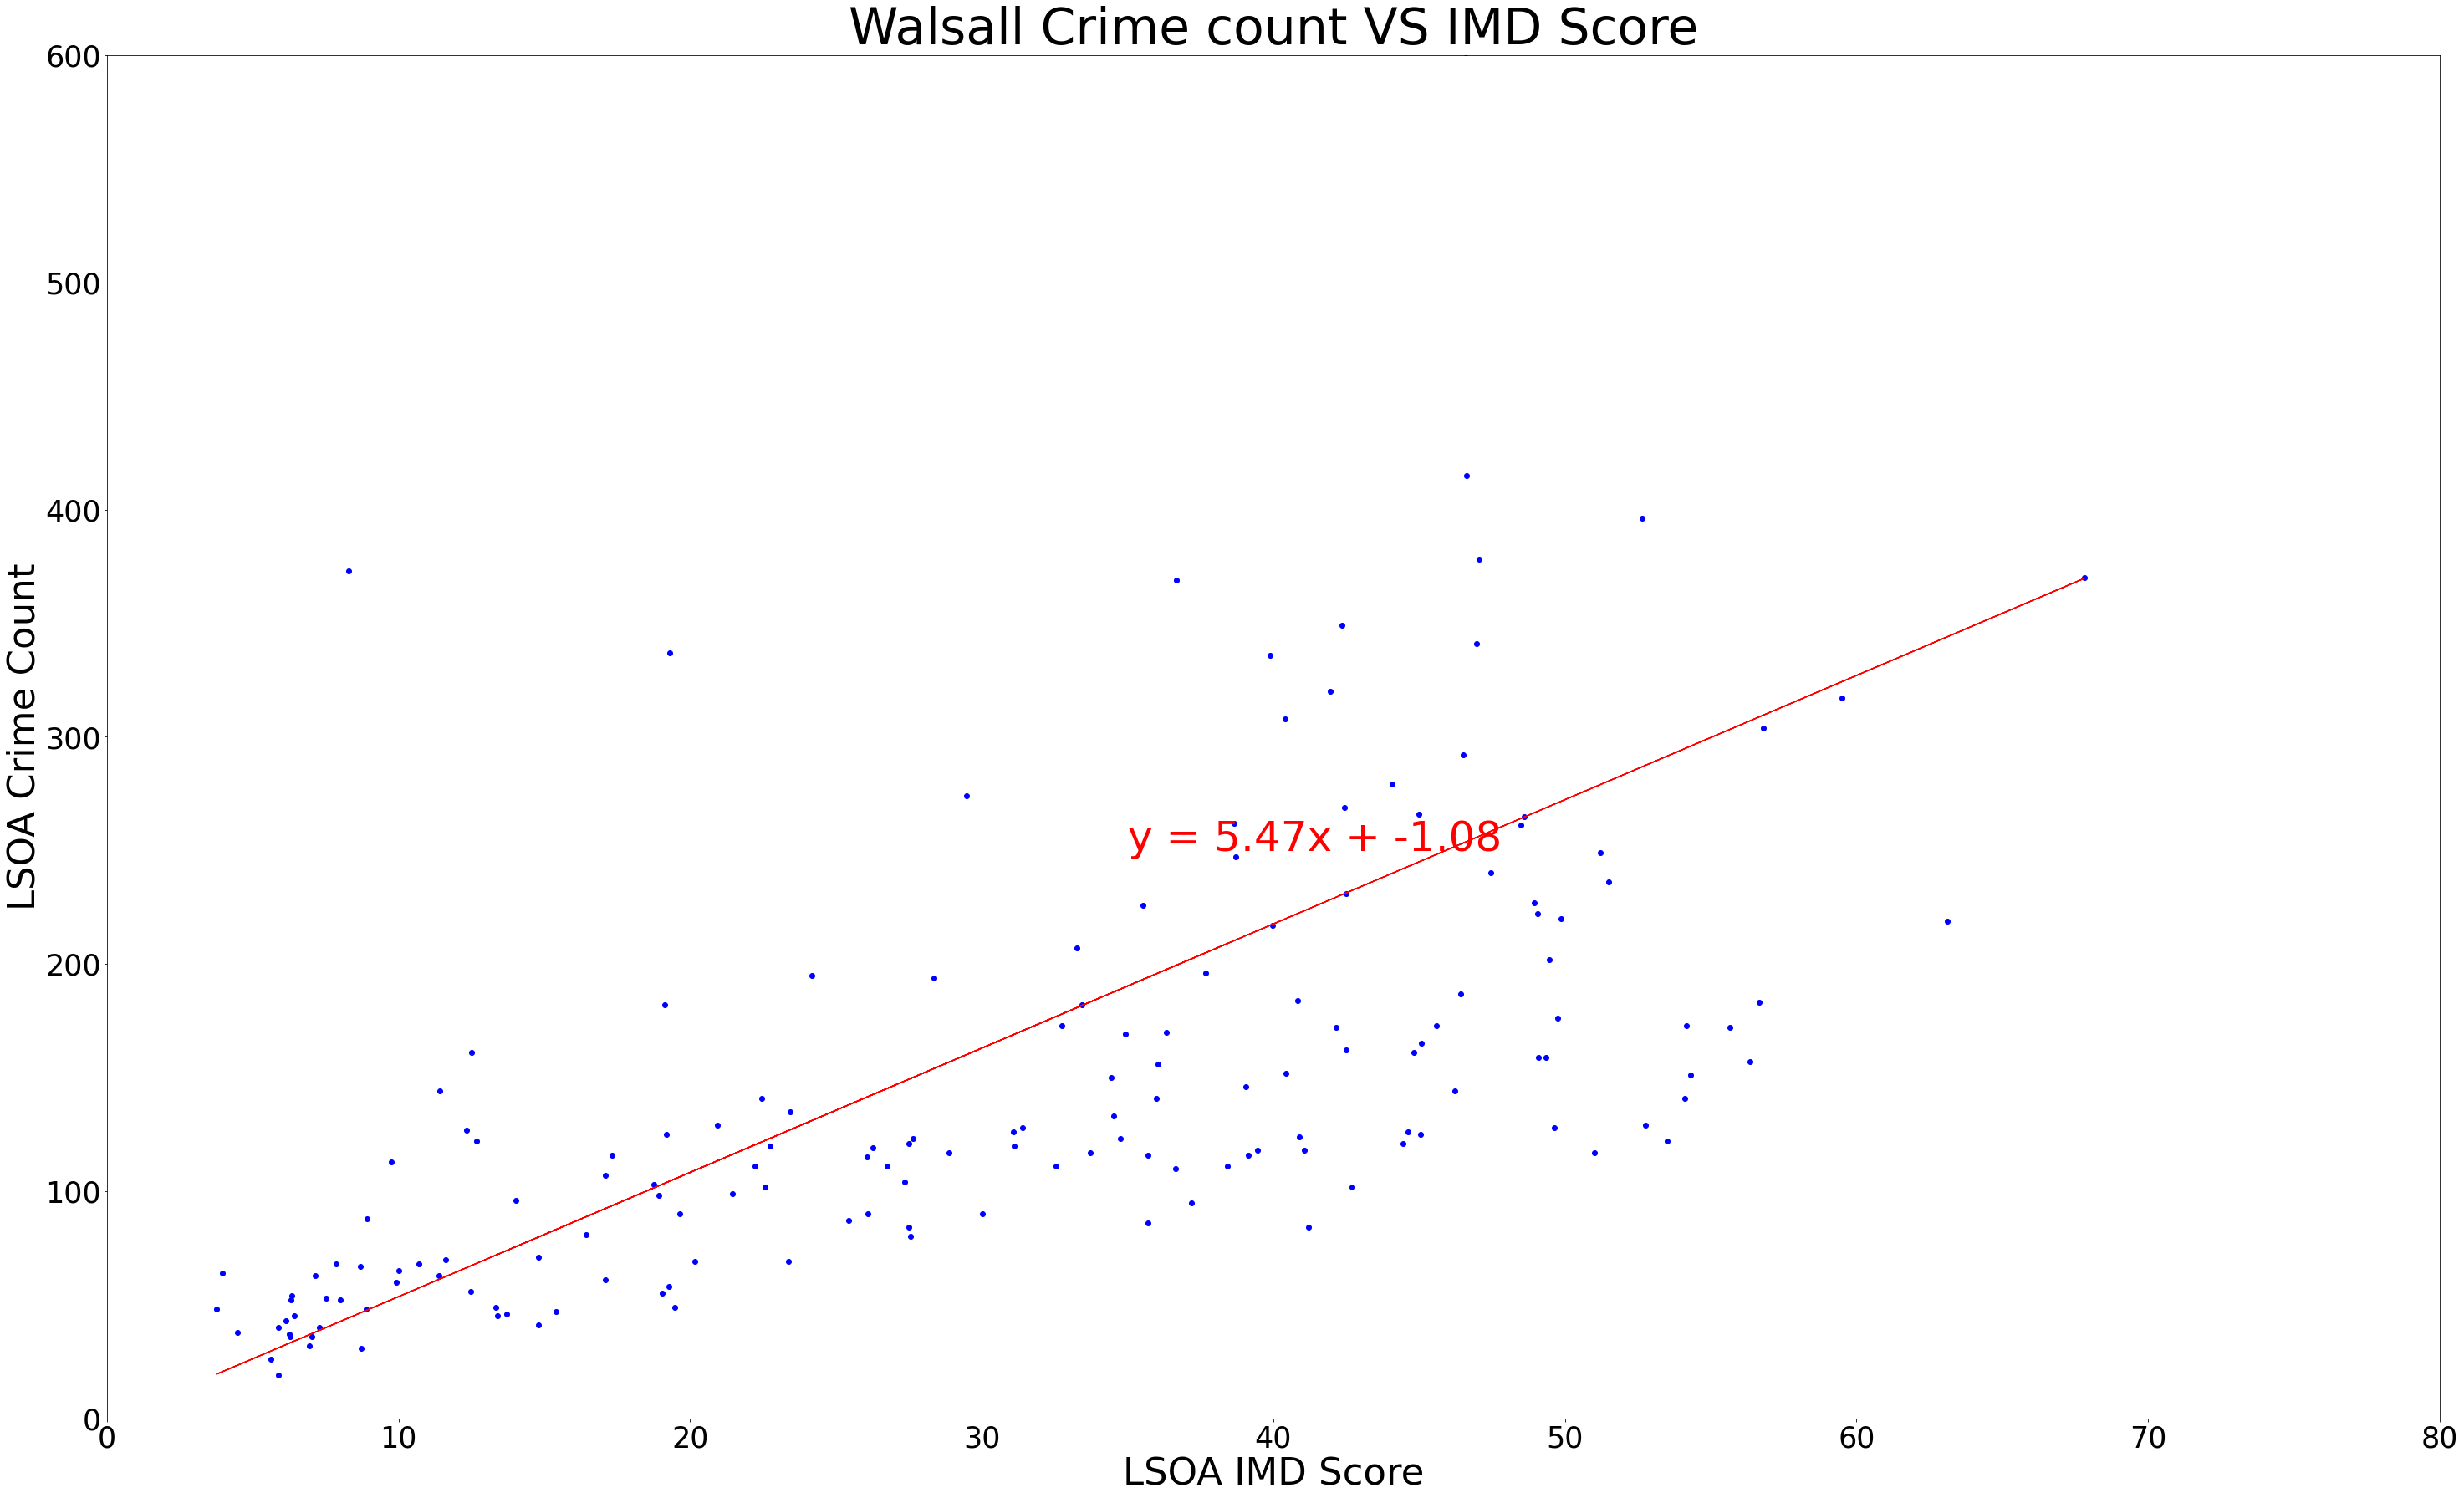

In [100]:
# Scatter plot to show results
y_axis = walsall_df["LSOA crime count"]
x_axis = walsall_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Walsall Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()

The r-value is: 0.0801222228288147


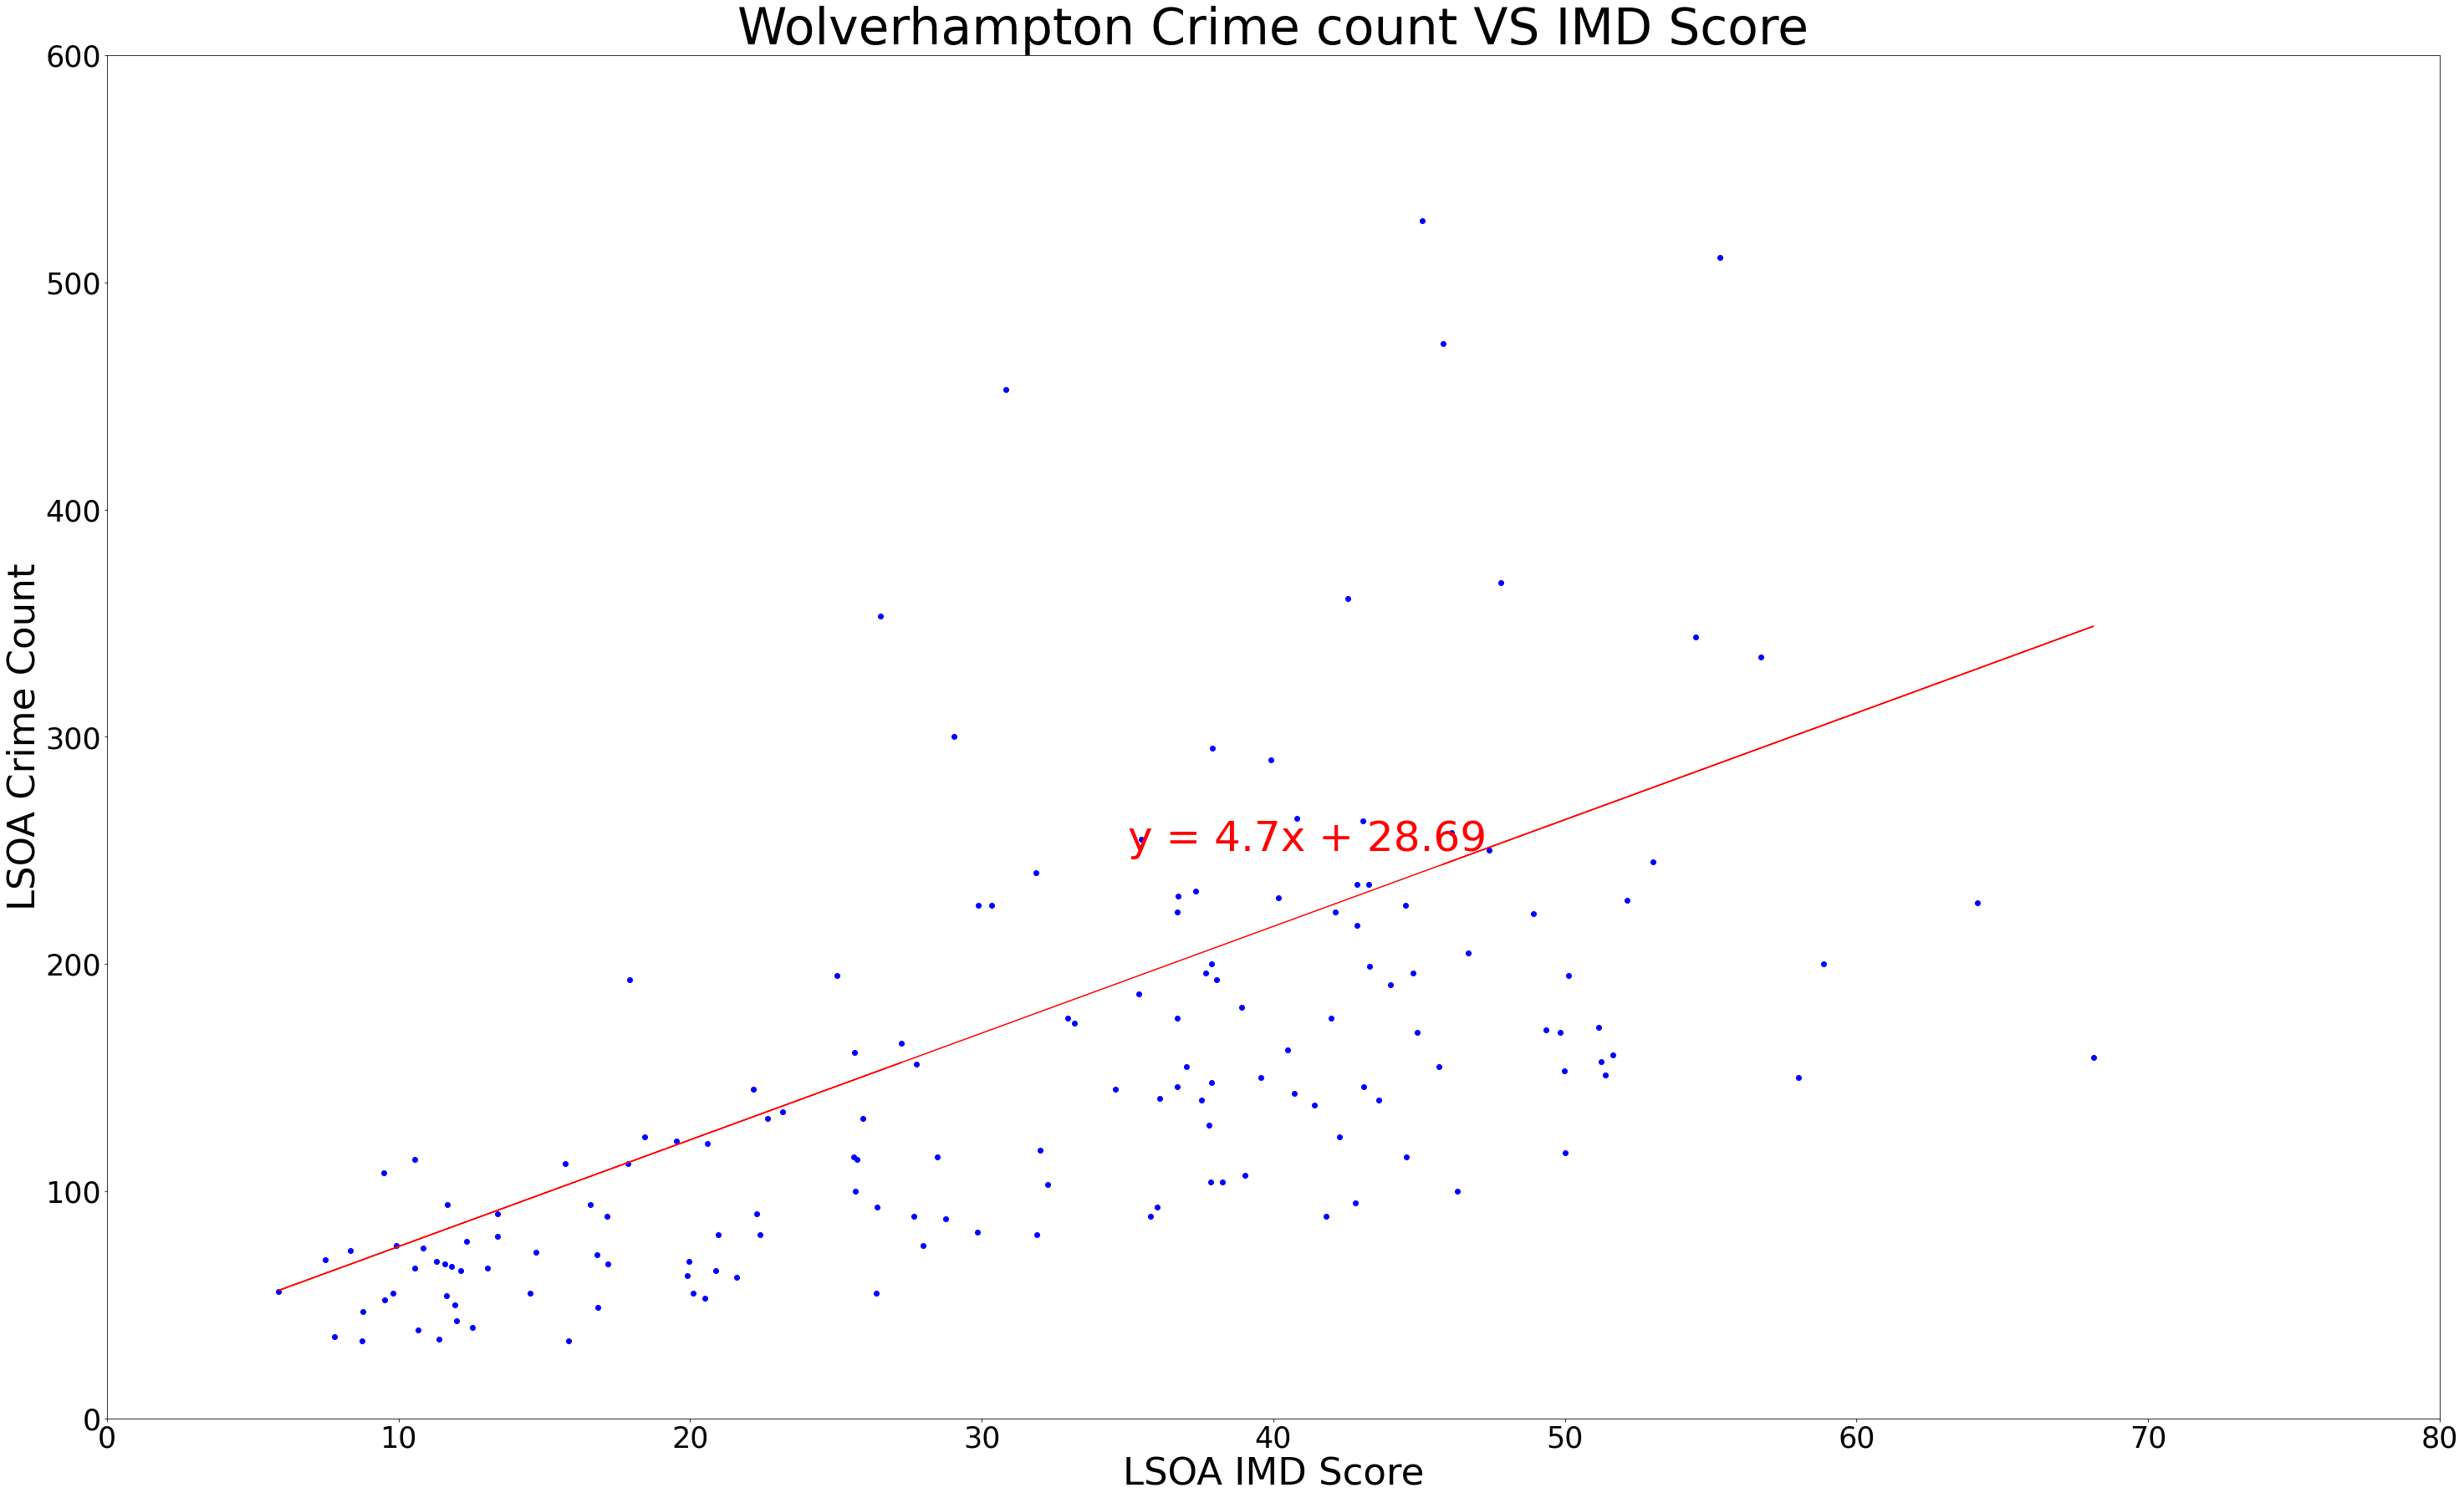

In [112]:
# Scatter plot to show results
y_axis = wolverhampton_df["LSOA crime count"]
x_axis = wolverhampton_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Wolverhampton Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.show()

In [ ]:
# Box plot to find outlilers?
# split into districts and then do boxplot for each district. Find data on outliers and try to come to conclusion 

## Research Question 2: Which district and Lower Layer Super Output Areas (LSOAs) have higher rates of crime?

In [44]:
# Groupby district

d = {"LSOA name": "first", "Crime ID": "count", "Population": "first", "Index of Multiple Deprivation (IMD)": "first"}
District_crime_count_df = West_midlands_df1.groupby(["District code (2019)"], as_index=False).agg(d)
District_crime_count_df = District_crime_count_df.rename(columns={"Crime ID":"District crime count"})
District_crime_count_df["District crime count"] = District_crime_count_df["District crime count"].div(1000)
District_crime_count_df

,District code (2019),LSOA name,District crime count,Population,Index of Multiple Deprivation (IMD)
0,E08000025,Birmingham 001A,130.172,1073045.0,7
1,E08000026,Coventry 001A,32.957,316960.0,3
2,E08000027,Dudley 001A,26.491,312925.0,3
3,E08000028,Sandwell 001A,32.282,308063.0,3
4,E08000029,Solihull 001A,17.856,206674.0,5
5,E08000030,Walsall 001A,27.862,269323.0,2
6,E08000031,Wolverhampton 001A,27.921,249470.0,3


The above df presents an interesting pattern which we did not expect. Solihull has a lower district crime count overall but a higher index of multiple deprivation than districts such as Wolverhampton, Walsall, Dudley, Sanwell, and Coventry which have higher crime counts but lower IMD scores. This supports the idea that our original hypothesis is incorrect. It also supports the scatter graph above which highlights that crime count and IMD score does not have a linear correlation.

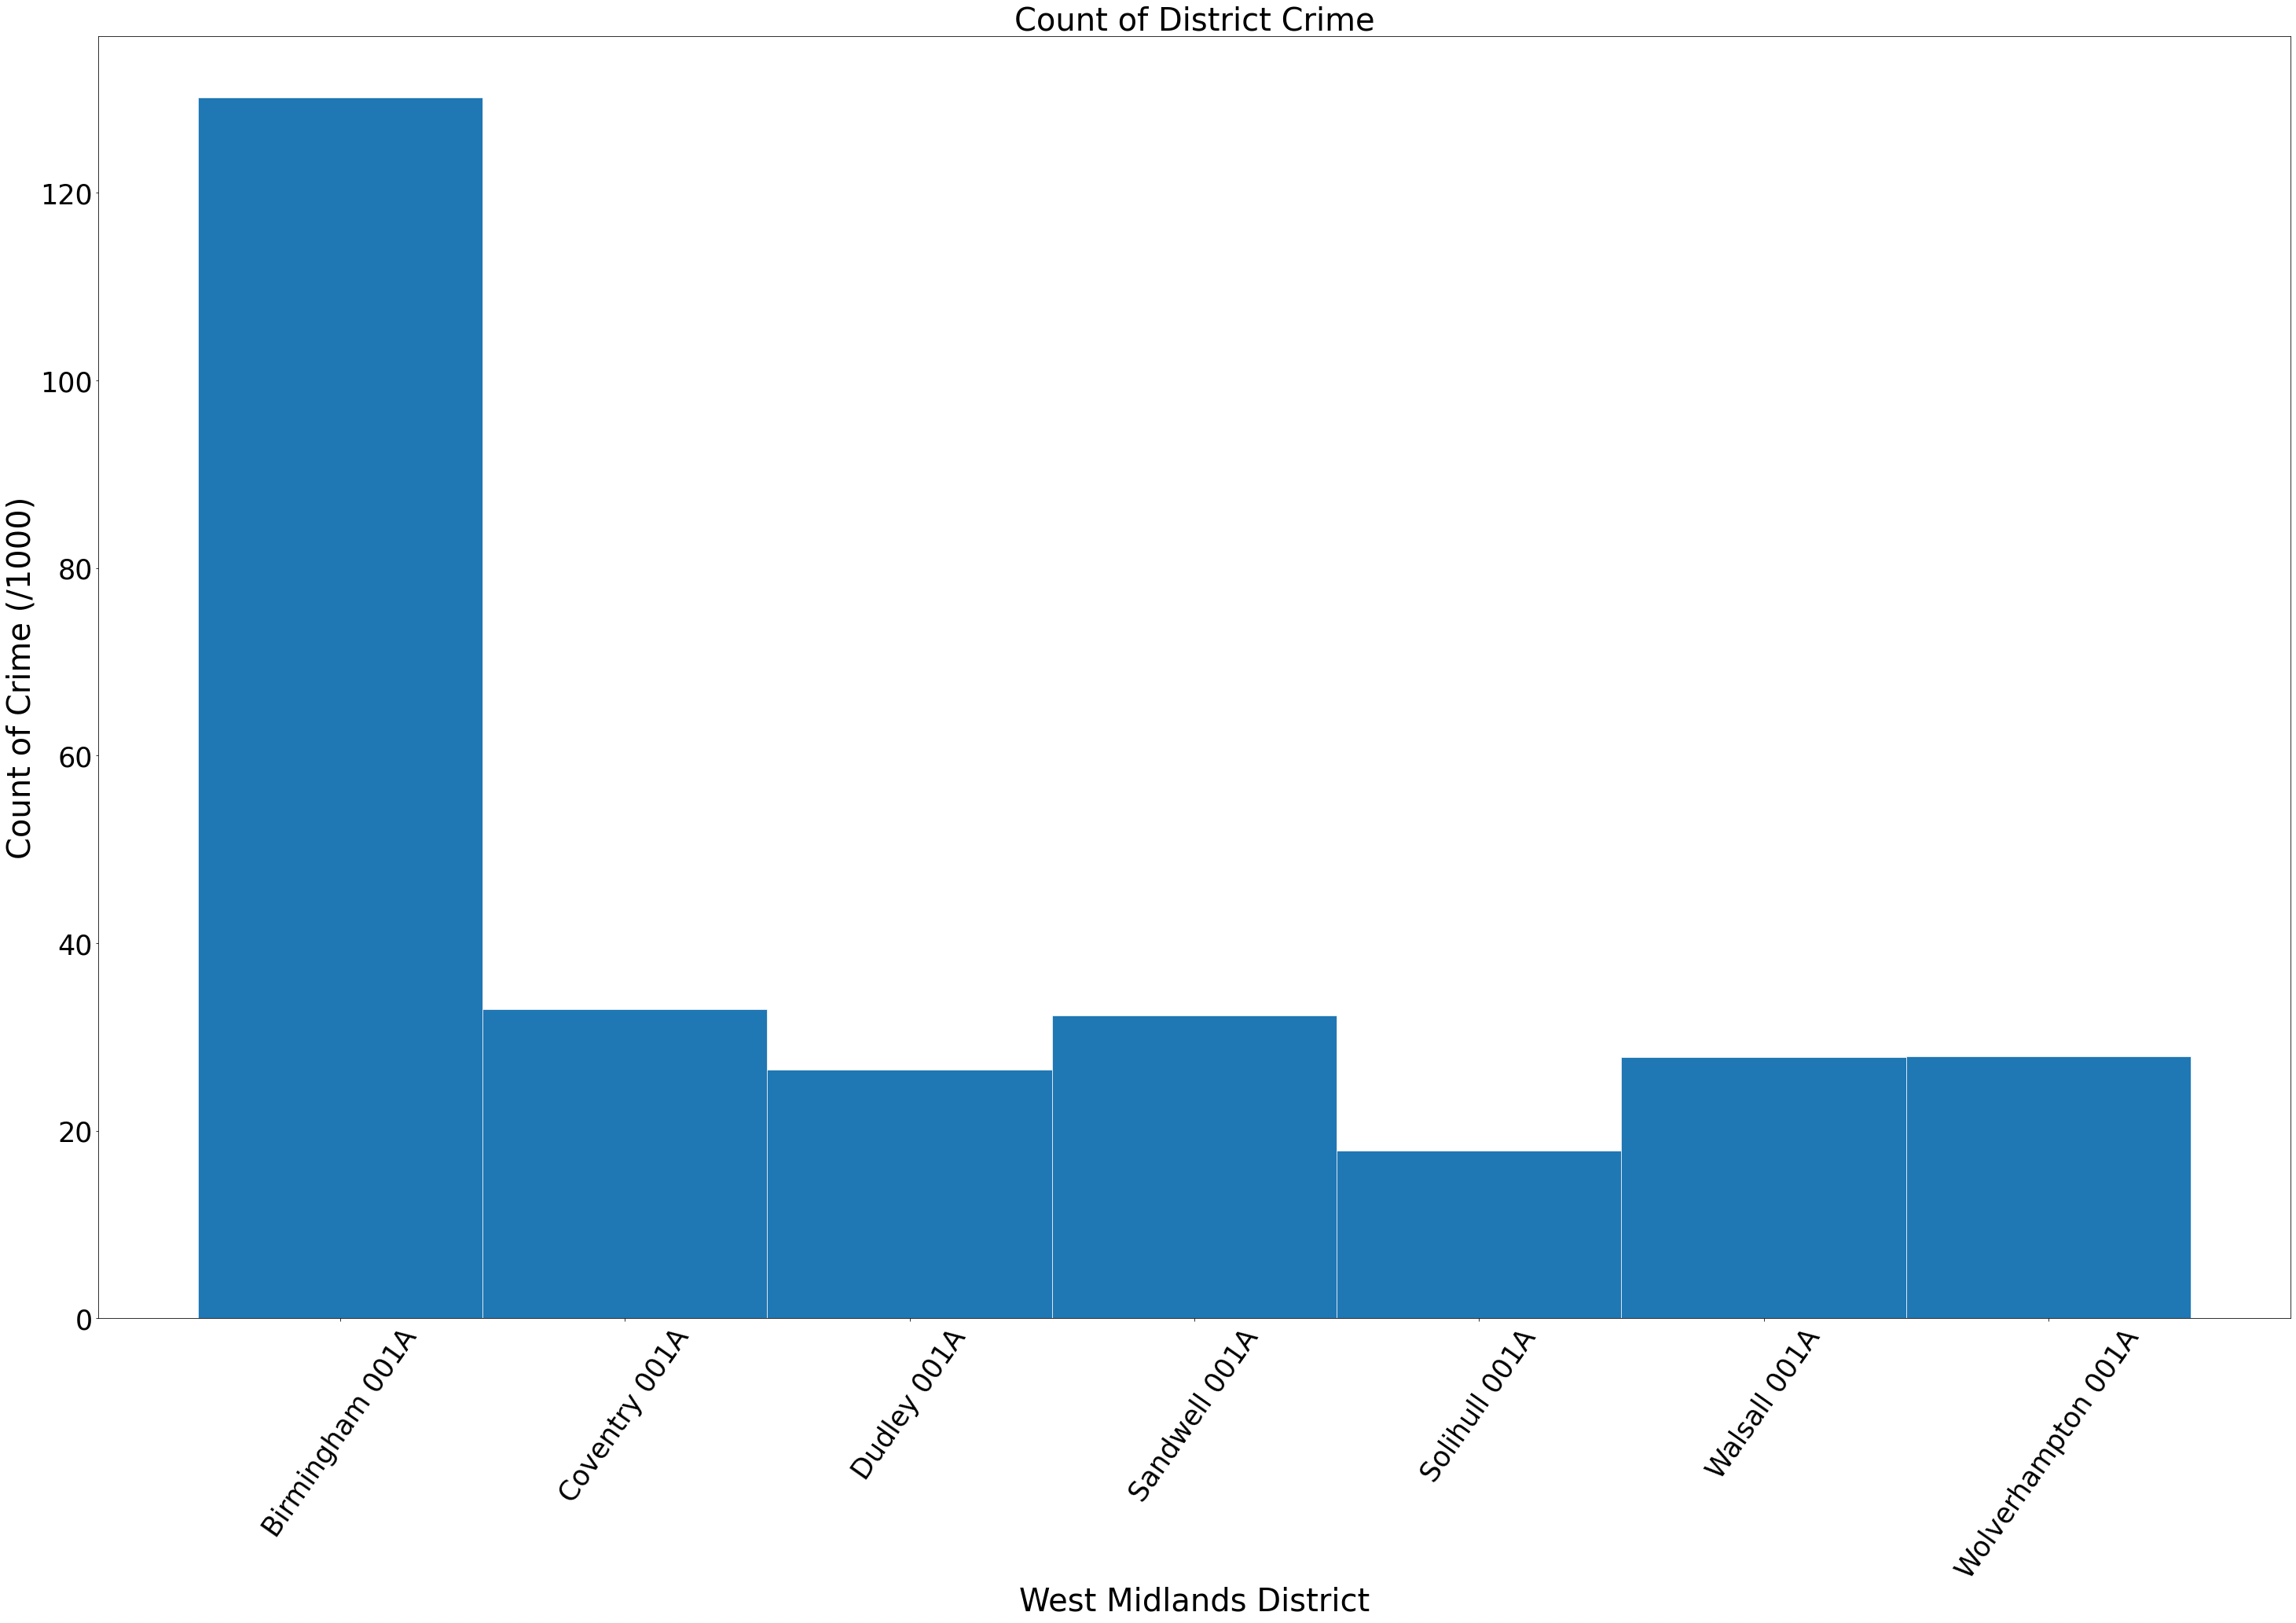

In [45]:
# Visualise data with bar plot 
x_axis = District_crime_count_df["LSOA name"]
y_axis = District_crime_count_df["District crime count"]
plt.bar(x_axis, y_axis, width=1, edgecolor="white", linewidth=0.7)
plt.title("Count of District Crime", fontsize=40)
plt.xlabel("West Midlands District", fontsize=40)
plt.ylabel("Count of Crime (/1000)", fontsize=40)
plt.xticks(rotation=55, fontsize=35)
plt.yticks(fontsize=35)
plt.tight_layout
plt.show()

# 2 axis - one on left and one on right?
# normalise - % pop 

The above bar plot shows that Birmingham sees the highest levels of crime by count. 

In [ ]:
# Do we need to plot population vs crime count for each district? or somethign to do with the IMD score for each district 

We have used a heatmap to visualise the areas within districts that have a higher exposure to crime. 

In [104]:
# google map stuff here.
LSOA_crime_count_df
LSOA_crime_locations = LSOA_crime_count_df[["Latitude", "Longitude"]]
incedents = LSOA_crime_count_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations, weights=incedents, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [105]:
# google map stuff here.
birmingham_df
LSOA_crime_locations1 = birmingham_df[["Latitude", "Longitude"]]
incedents1 = birmingham_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig1 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations1, weights=incedents1, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig1.add_layer(heat_layer)

# Display figure
fig1

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [106]:
# google map stuff here.
coventry_df
LSOA_crime_locations2 = coventry_df[["Latitude", "Longitude"]]
incedents2 = coventry_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig2 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations2, weights=incedents2, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig2.add_layer(heat_layer)

# Display figure
fig2

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [107]:
# google map stuff here.
solihull_df
LSOA_crime_locations3 = solihull_df[["Latitude", "Longitude"]]
incedents3 = solihull_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig3 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations3, weights=incedents3, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig3.add_layer(heat_layer)

# Display figure
fig3

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [108]:
# google map stuff here.
walsall_df
LSOA_crime_locations4 = walsall_df[["Latitude", "Longitude"]]
incedents4 = walsall_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig4 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations4, weights=incedents4, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig4.add_layer(heat_layer)

# Display figure
fig4

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [109]:
# google map stuff here.
sandwell_df
LSOA_crime_locations5 = sandwell_df[["Latitude", "Longitude"]]
incedents5 = sandwell_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig5 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations5, weights=incedents5, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig5.add_layer(heat_layer)

# Display figure
fig5

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [113]:
# google map stuff here.
wolverhampton_df
LSOA_crime_locations6 = wolverhampton_df[["Latitude", "Longitude"]]
incedents6 = wolverhampton_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig6 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations6, weights=incedents6, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig6.add_layer(heat_layer)

# Display figure
fig6

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

## Research Question 3: What type of crime might you be exposed to in certain Districts/LSOAs?

## Birmingham crime data.

In [49]:
Birmingham = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000025")]
Birmingham.head()

Birmingham["Crime type"].unique()

array(['Burglary', 'Other theft', 'Public order',
       'Criminal damage and arson', 'Violence and sexual offences',
       'Vehicle crime', 'Other crime', 'Anti-social behaviour', 'Robbery',
       'Possession of weapons', 'Drugs', 'Shoplifting',
       'Theft from the person', 'Bicycle theft'], dtype=object)

In [50]:
b = {"Crime type": "first", "Crime ID": "count"}
Birmingham_crime = Birmingham.groupby(["Crime type"], as_index=False).agg(b)
Birmingham_crime = Birmingham_crime.rename(columns={"Crime ID":"Birmingham Crime count"})
Birmingham_crime

,Crime type,Birmingham Crime count
0,Anti-social behaviour,15800
1,Bicycle theft,1053
2,Burglary,10635
3,Criminal damage and arson,10305
4,Drugs,2885
5,Other crime,1785
6,Other theft,9603
7,Possession of weapons,1446
8,Public order,7932
9,Robbery,4917


Text(0.5, 1.0, 'Birmingham Crime Type (%) 2019')

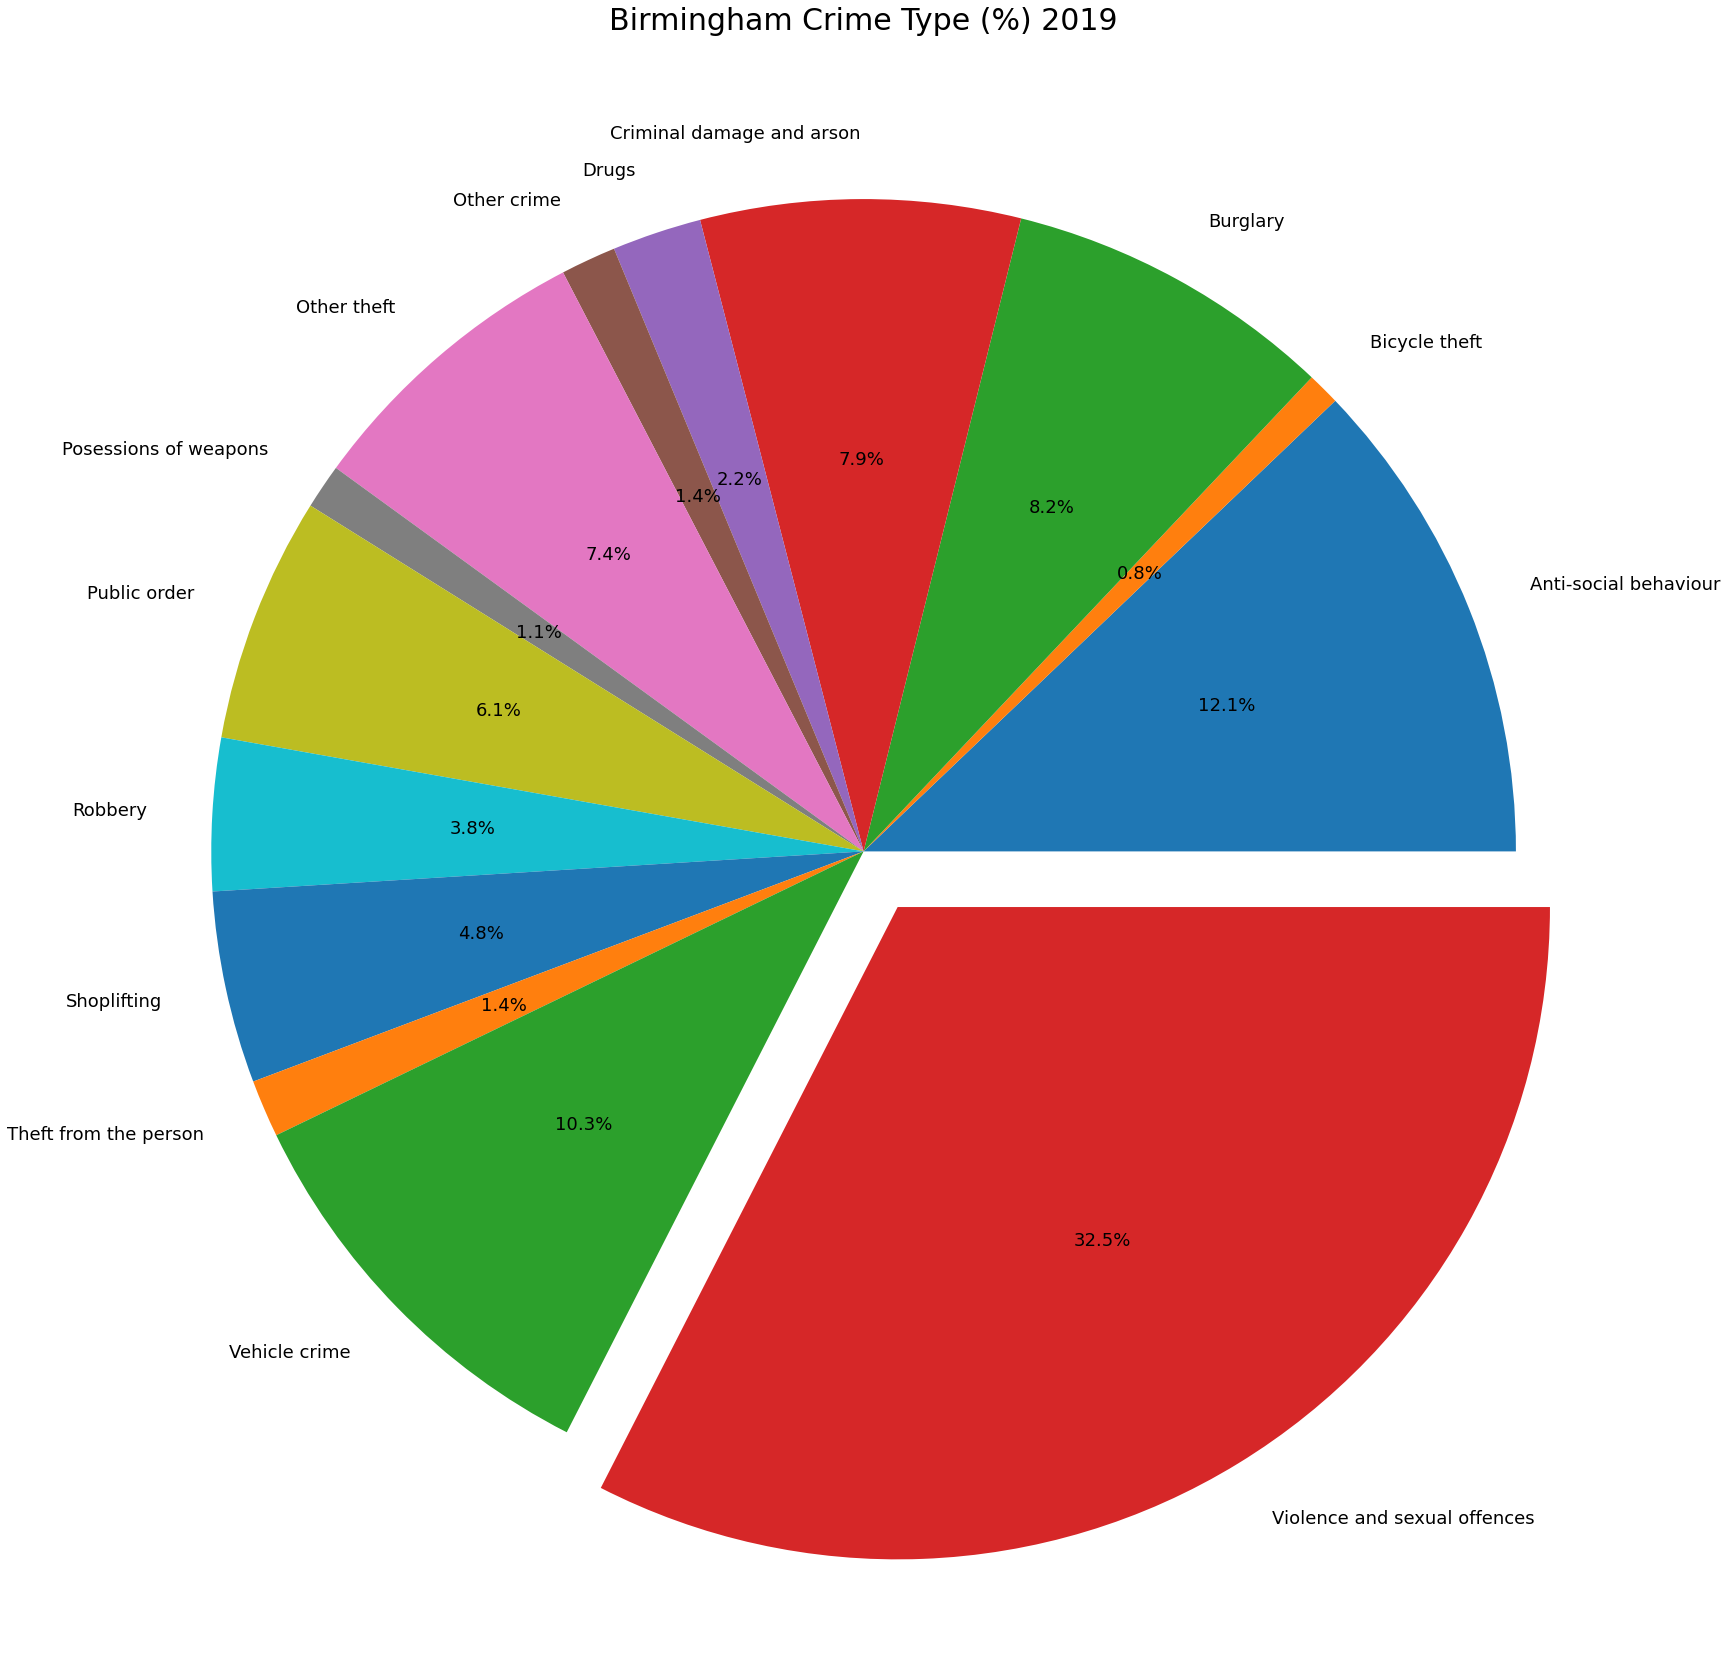

In [55]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Birmingham_crime["Birmingham Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Birmingham Crime Type (%) 2019", fontsize=30)

In Birmingham you are omre likley to be exposed to violence and sexual offences which made up nearly a third of the crime in 2019. Anti-social behaviour 

We have chosen the LSOA with the highest crime rate in order to deeper dive into the data and see if we can find any patterns.

In [56]:
# Find max count tyoe for Birmingaham 
B_LSOA_crime_count_df = LSOA_crime_count_df[(LSOA_crime_count_df["District code (2019)"]=="E08000025")]
print(B_LSOA_crime_count_df[B_LSOA_crime_count_df["LSOA crime count"] == B_LSOA_crime_count_df["LSOA crime count"].max()])

           LSOA name  LSOA crime count  LSOA IMD Score District code (2019)  \
620  Birmingham 138A              4707          27.122            E08000025   

     Longitude   Latitude  
620  -1.894661  52.481417  


Text(0.5, 1.0, 'Birmingham 138A Crime Type (%) 2019')

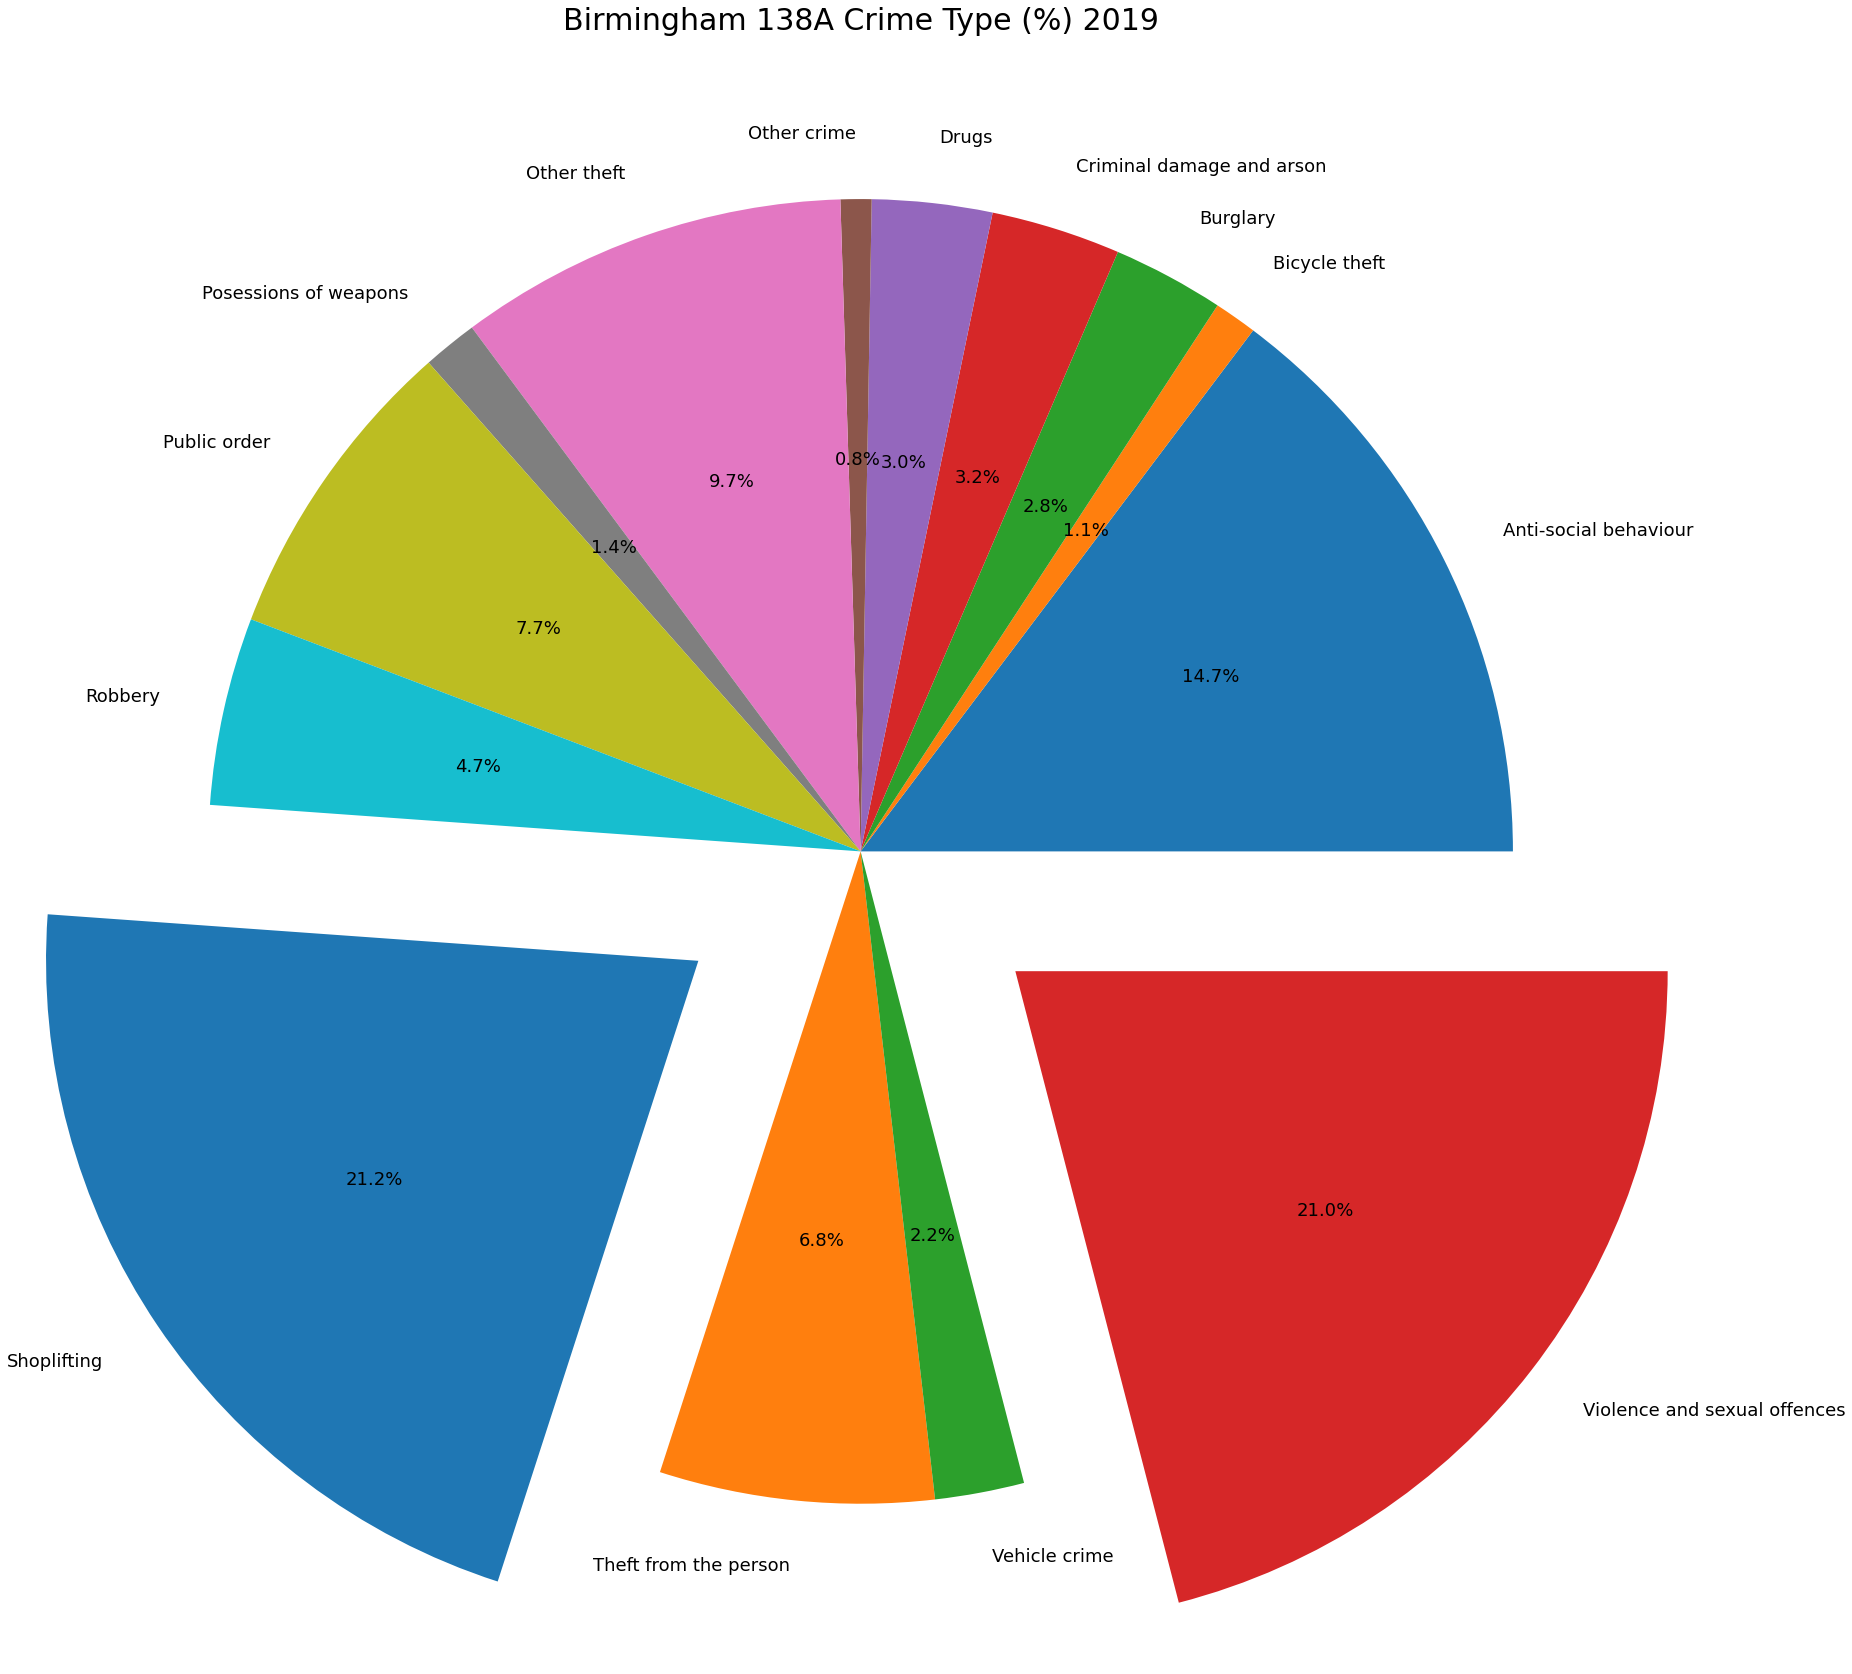

In [57]:
# Show crime types for LSOA
Birmingham_max_crime = West_midlands_df1[(West_midlands_df1["LSOA name"]=="Birmingham 138A")]

# USE API to find out which area this is??

bm = {"Crime type": "first", "Crime ID": "count"}
Birmingham_max_crime_count = Birmingham_max_crime.groupby(["Crime type"], as_index=False).agg(b)
Birmingham_max_crime_count = Birmingham_max_crime_count.rename(columns={"Crime ID":"Birmingham 138A Crime count"})
Birmingham_max_crime_count

labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Birmingham_max_crime_count["Birmingham 138A Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0 , 0 , 0.3)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Birmingham 138A Crime Type (%) 2019", fontsize=30)

Analysis - 

## Coventry crime data.

In [51]:
Coventry = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000026")]
c = {"Crime type": "first", "Crime ID": "count"}
Coventry_crime = Coventry.groupby(["Crime type"], as_index=False).agg(c)
Coventry_crime = Coventry_crime.rename(columns={"Crime ID":"Coventry Crime count"})
Coventry_crime

,Crime type,Coventry Crime count
0,Anti-social behaviour,4568
1,Bicycle theft,572
2,Burglary,2841
3,Criminal damage and arson,2982
4,Drugs,515
5,Other crime,427
6,Other theft,2209
7,Possession of weapons,304
8,Public order,1594
9,Robbery,920


Text(0.5, 1.0, 'Coventry Crime Type (%) 2019')

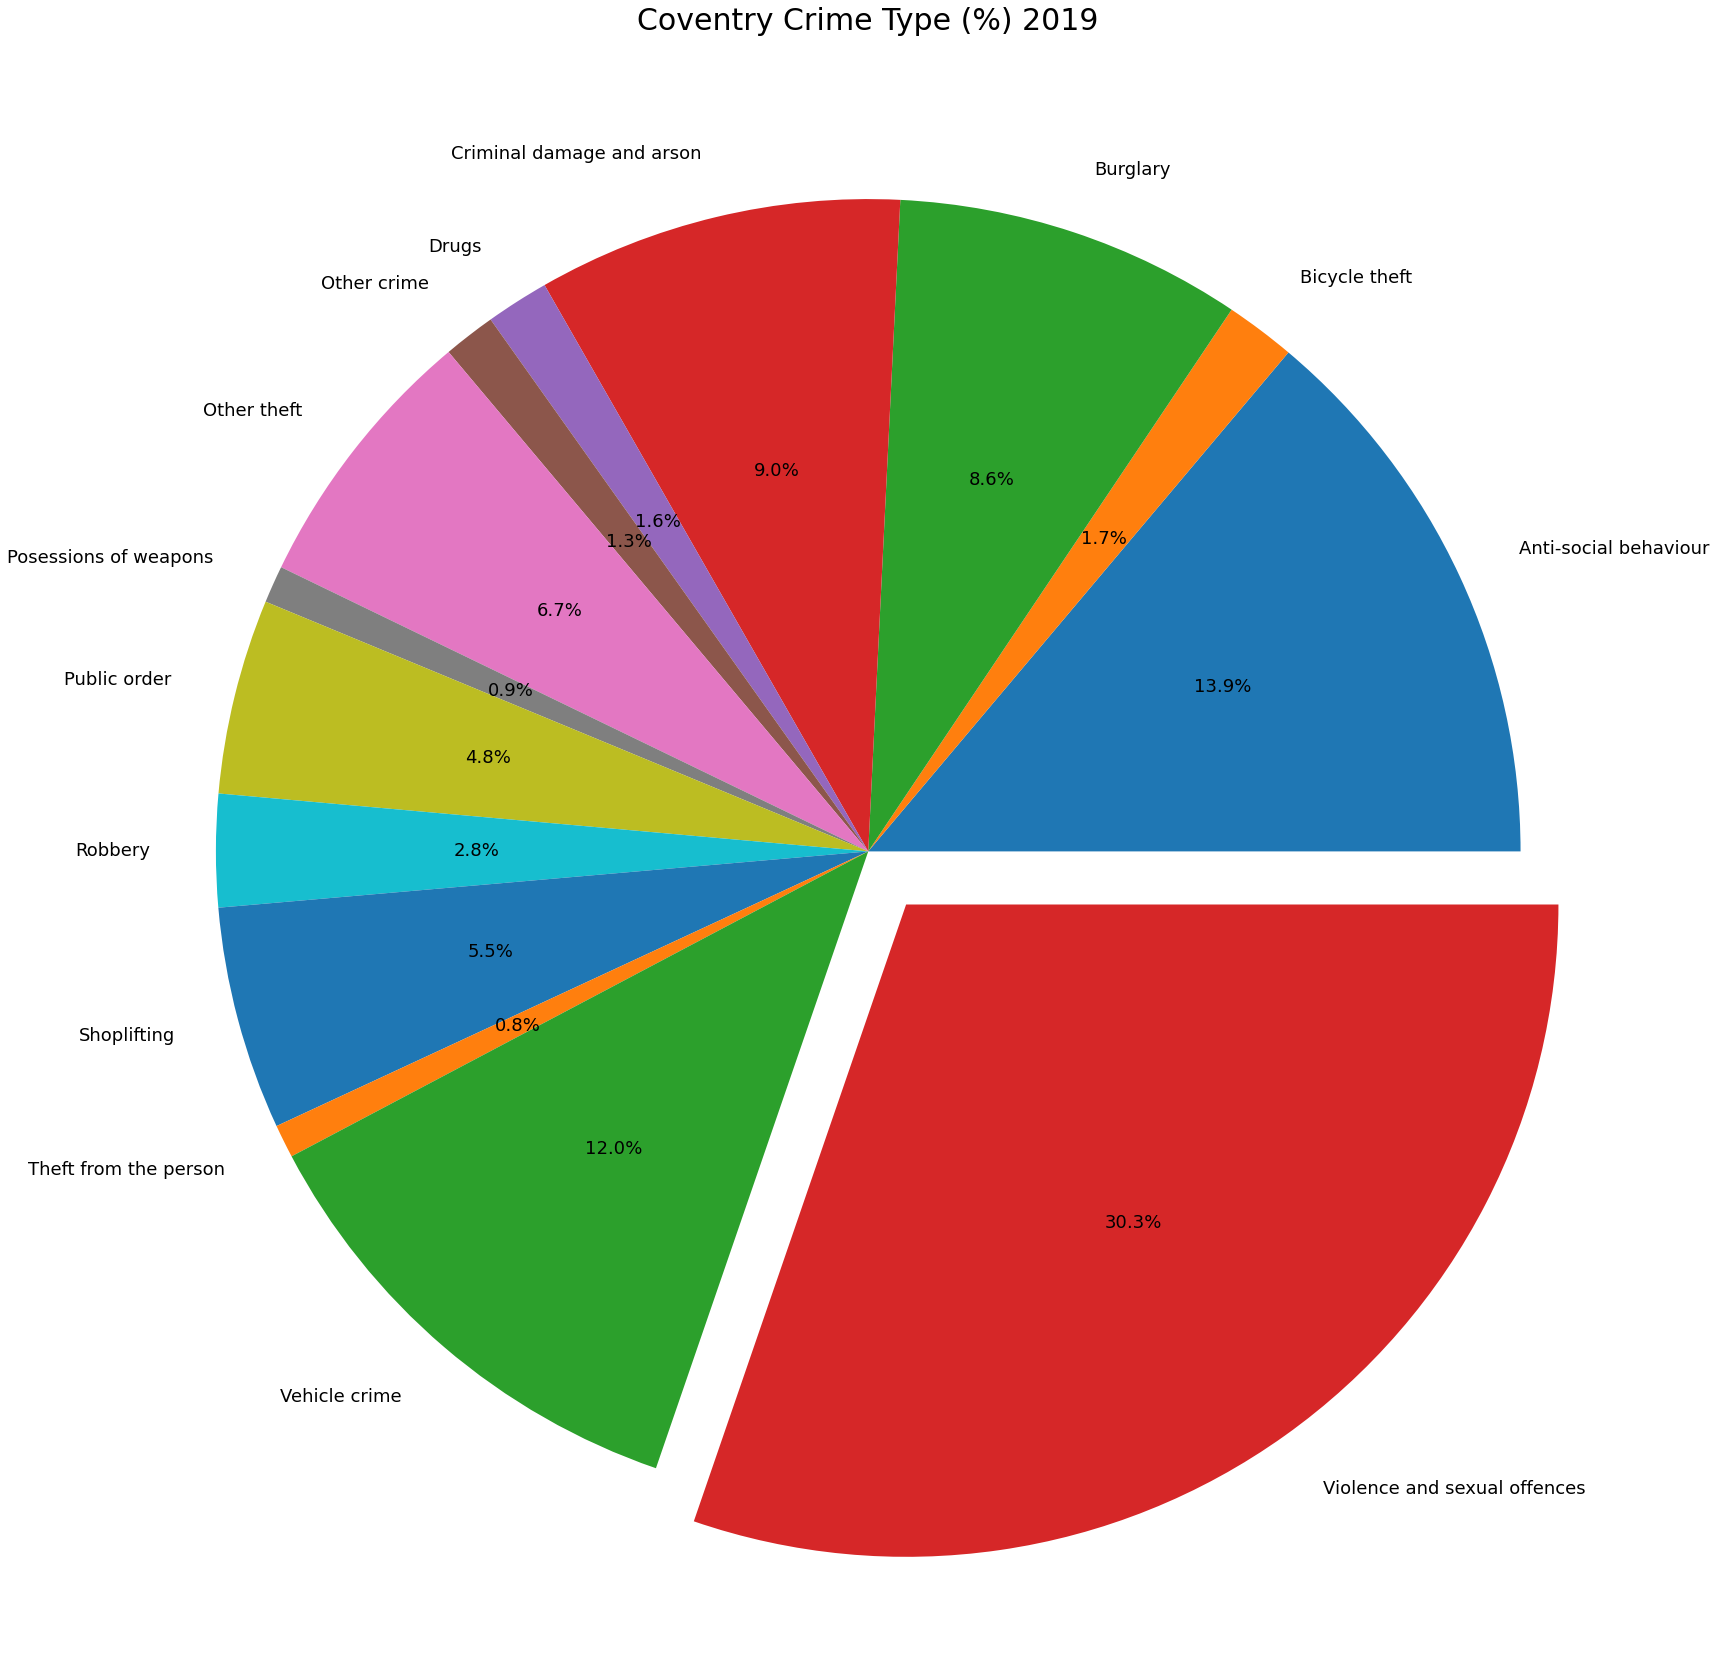

In [59]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Coventry_crime["Coventry Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Coventry Crime Type (%) 2019", fontsize=30)

Cov analysis

## Dudley crime data

In [52]:
Dudley = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000027")]
du = {"Crime type": "first", "Crime ID": "count"}
Dudley_crime = Dudley.groupby(["Crime type"], as_index=False).agg(du)
Dudley_crime = Dudley_crime.rename(columns={"Crime ID":"Dudley Crime count"})
Dudley_crime

,Crime type,Dudley Crime count
0,Anti-social behaviour,3253
1,Bicycle theft,80
2,Burglary,2462
3,Criminal damage and arson,2419
4,Drugs,339
5,Other crime,409
6,Other theft,1589
7,Possession of weapons,247
8,Public order,1421
9,Robbery,535


Text(0.5, 1.0, 'Dudley Crime Type (%) 2019')

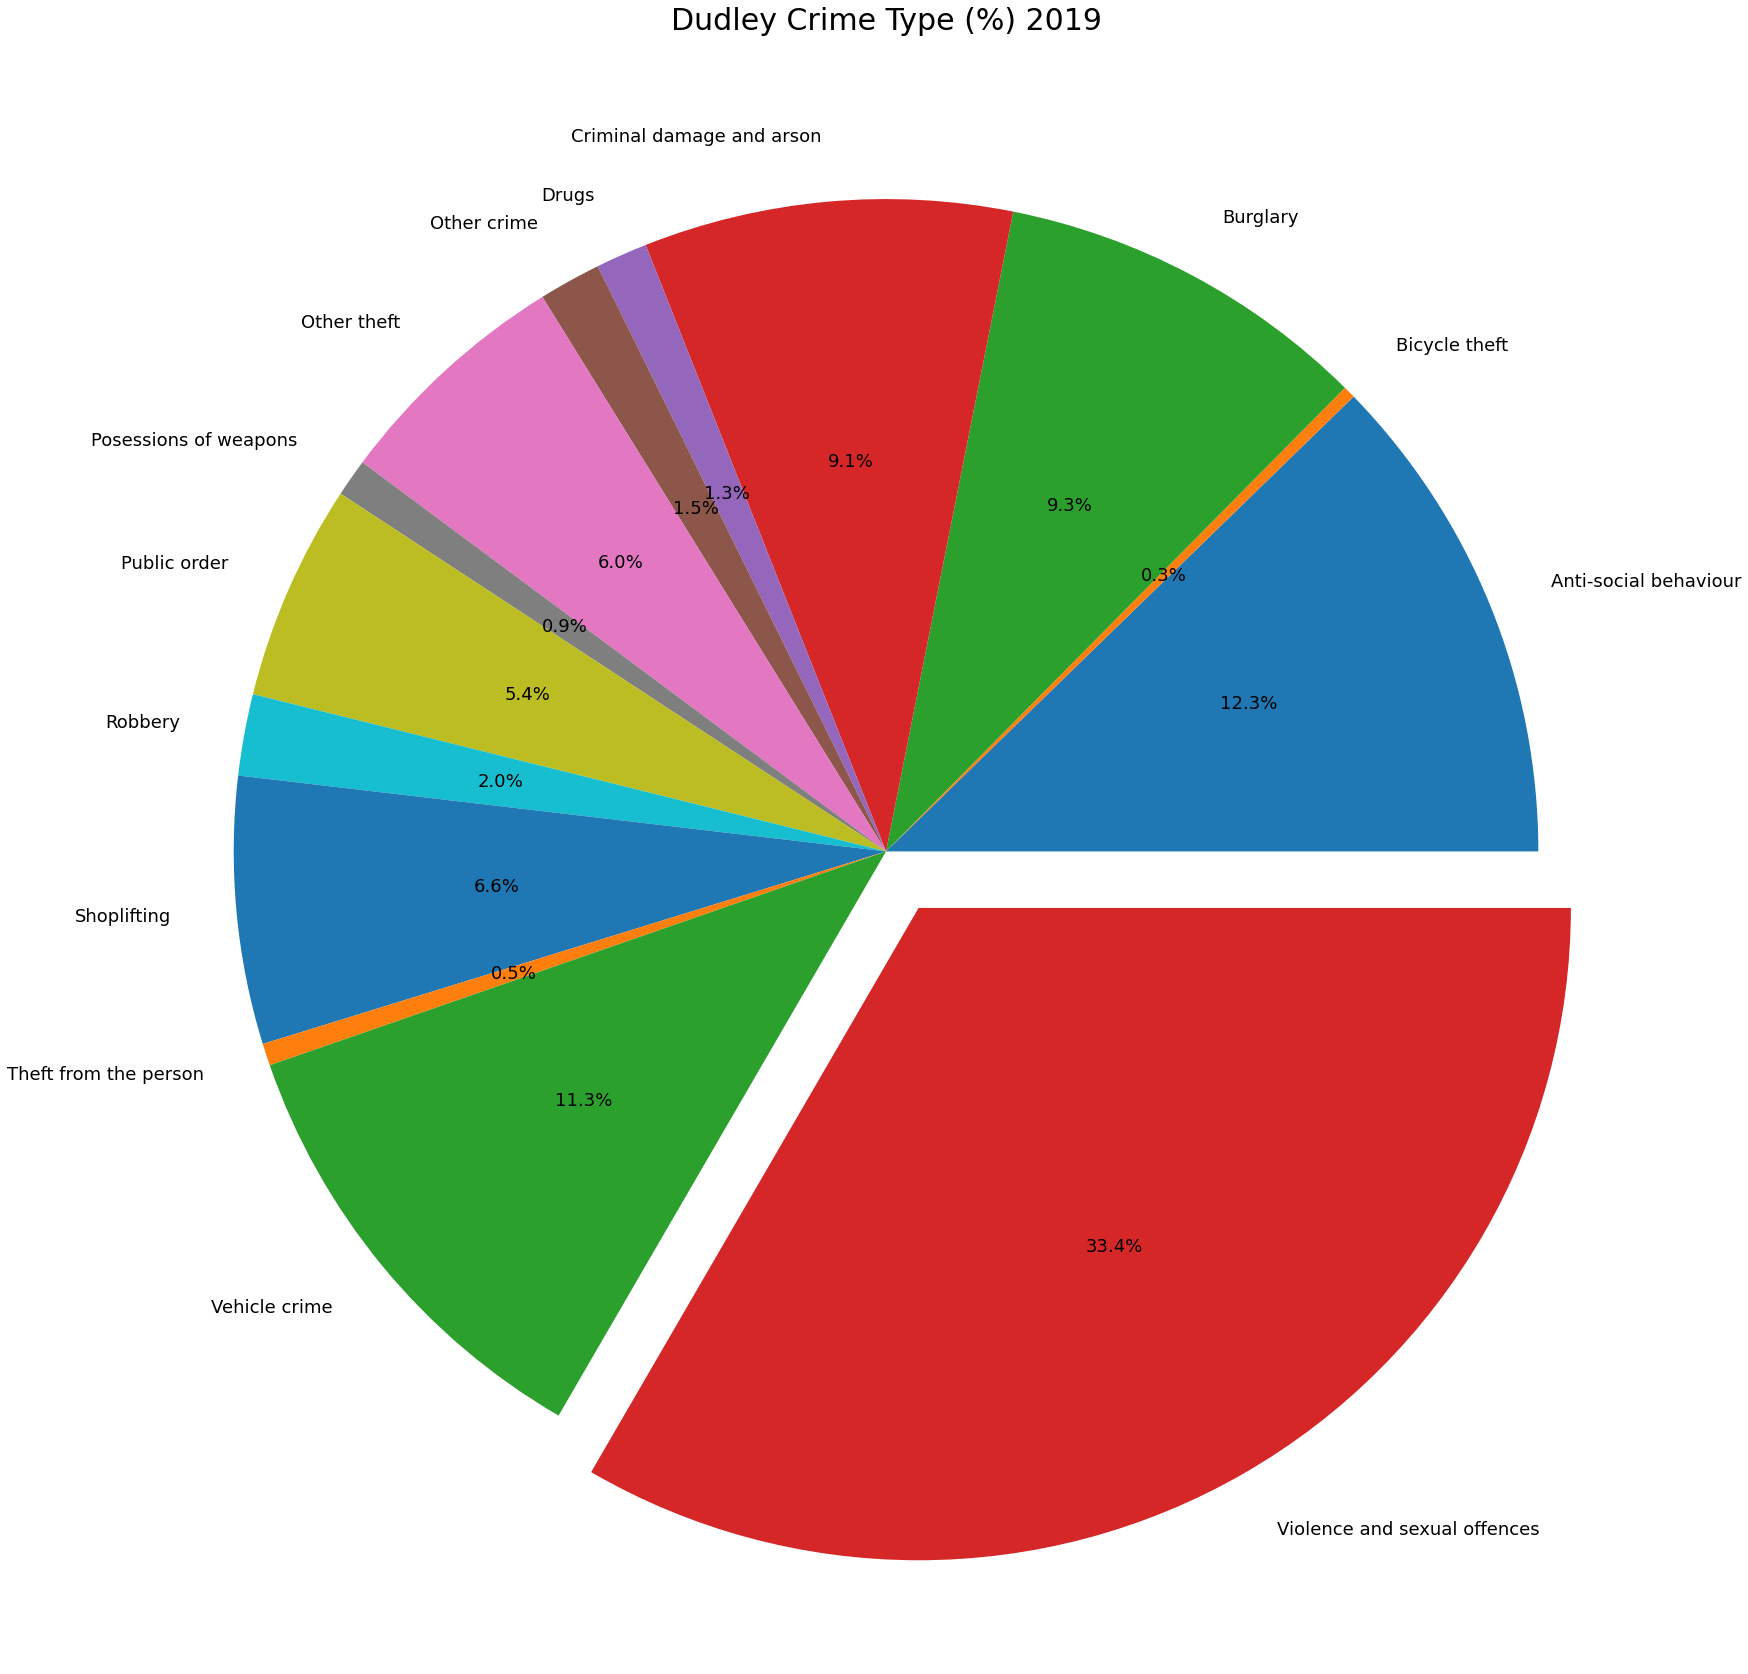

In [61]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Dudley_crime["Dudley Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Dudley Crime Type (%) 2019", fontsize=30)

Dudley analysis

## Sandwell crime data

In [53]:
Sandwell = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000028")]
s = {"Crime type": "first", "Crime ID": "count"}
Sandwell_crime = Sandwell.groupby(["Crime type"], as_index=False).agg(c)
Sandwell_crime = Sandwell_crime.rename(columns={"Crime ID":"Sandwell Crime count"})
Sandwell_crime

,Crime type,Sandwell Crime count
0,Anti-social behaviour,3796
1,Bicycle theft,132
2,Burglary,2965
3,Criminal damage and arson,2813
4,Drugs,700
5,Other crime,471
6,Other theft,2151
7,Possession of weapons,278
8,Public order,1823
9,Robbery,794


Text(0.5, 1.0, 'Sandwell Crime Type (%) 2019')

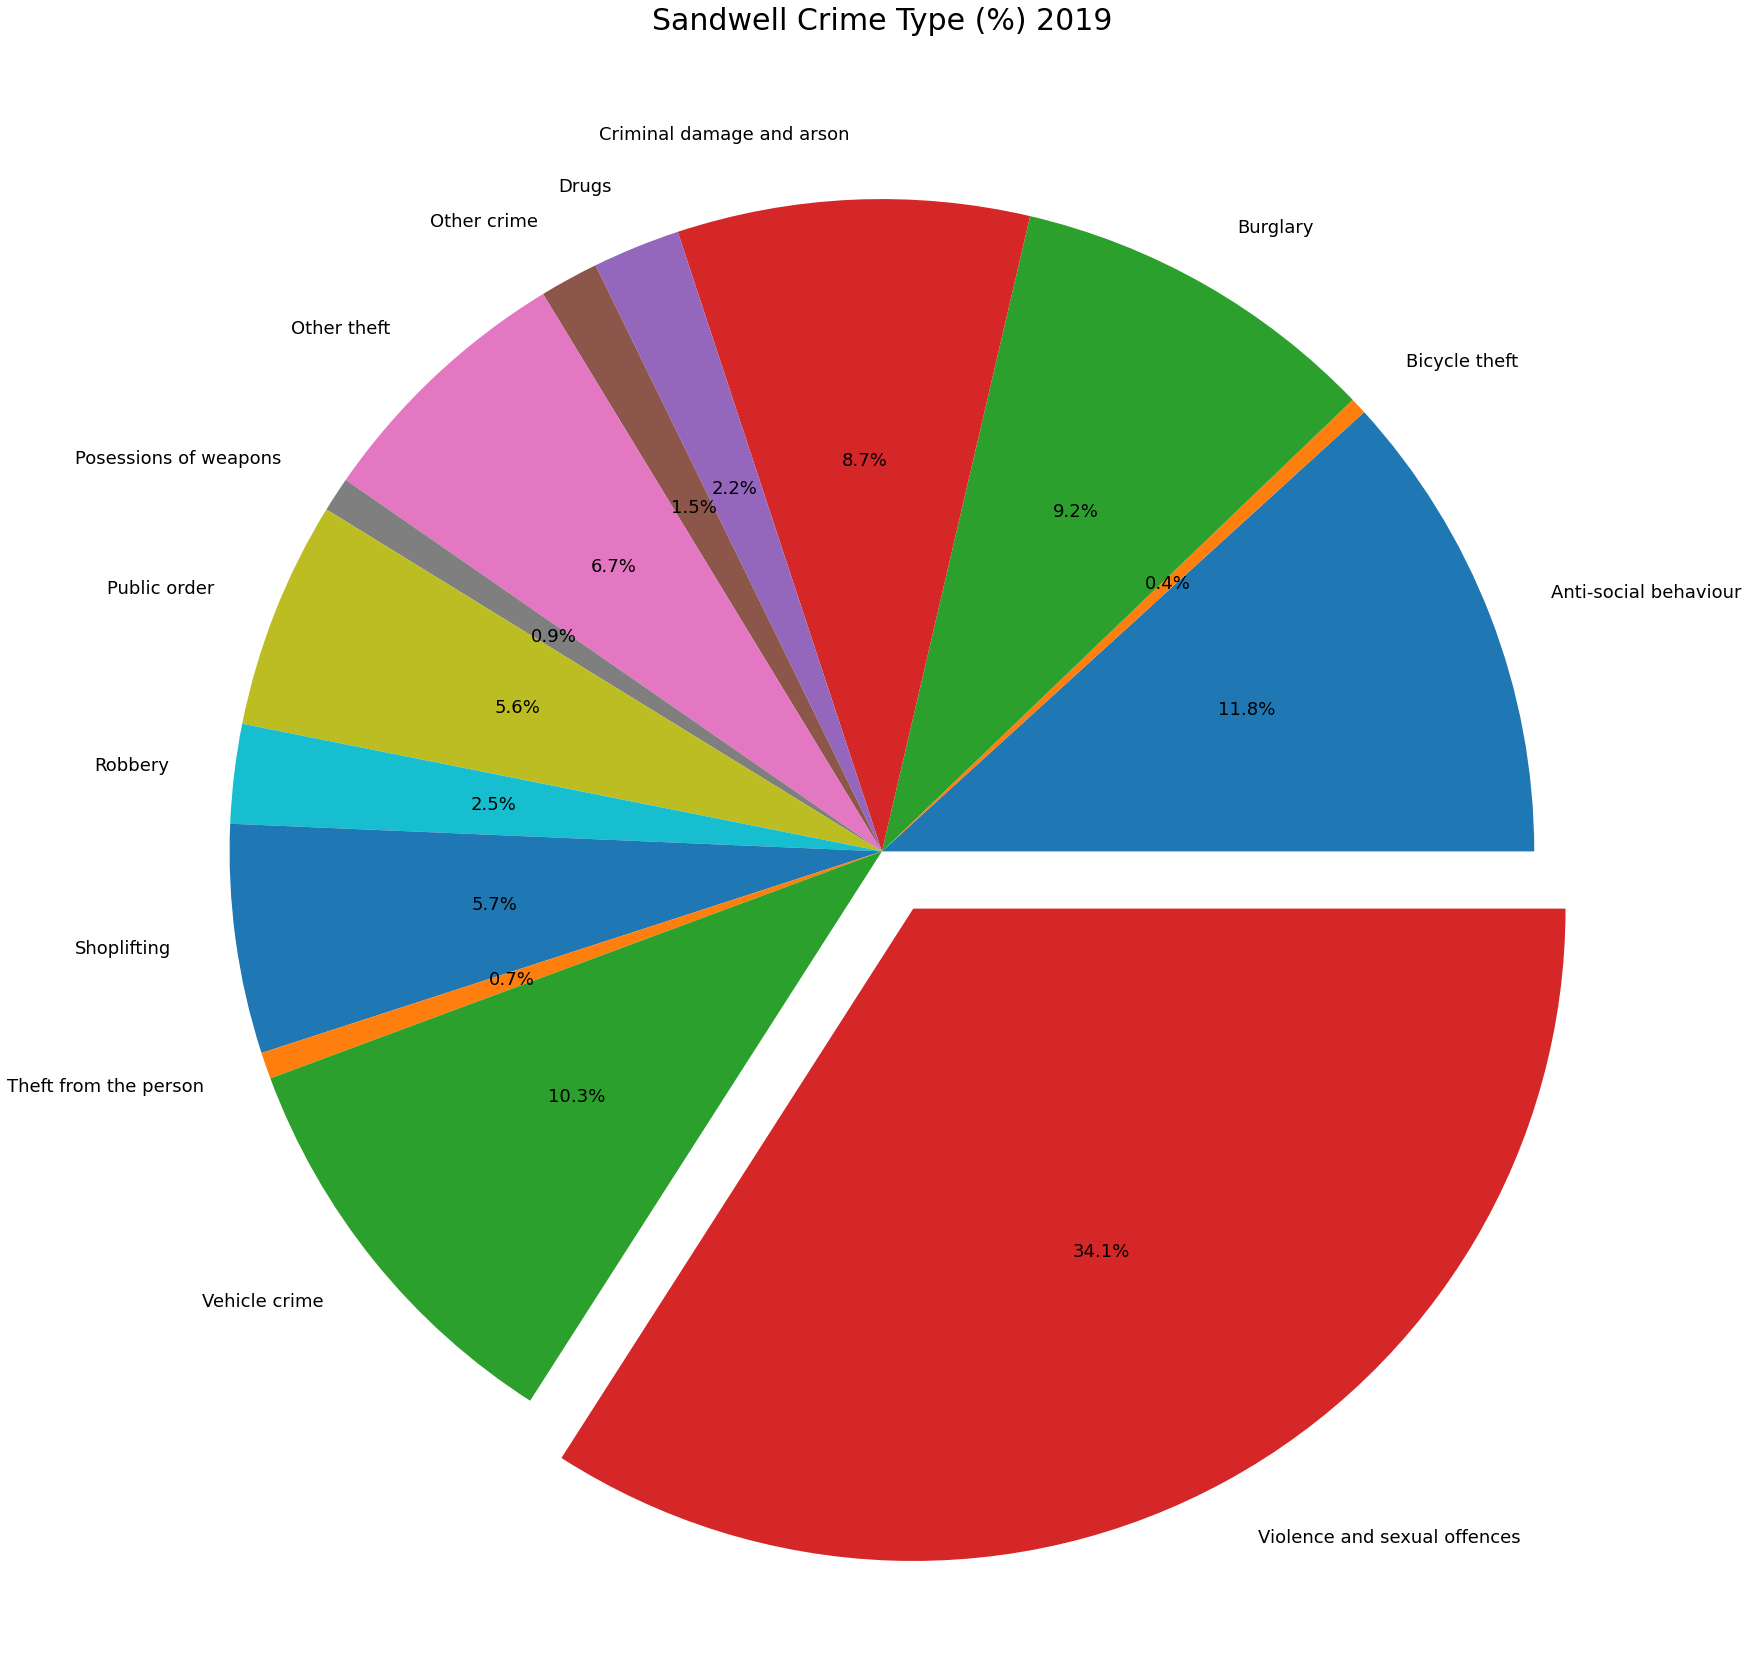

In [63]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Sandwell_crime["Sandwell Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Sandwell Crime Type (%) 2019", fontsize=30)

Sandwell analysis

Overall: The pie charts show that 

In [ ]:
# We need to notice high levels of bike crime here

## Research Question 4: Where is the safest place to park your bike?

## Conclusion

We found the following:
- Outliers = 
- A lower IMD score does not mean that there will be less crime and a higher IMD score does not mean that there will be a higher crime rate. 
- Each district in the West Midlands has a similar crime trend. Violent and sexual offences make up the largest proportion of crime for all districts. And the other types of crime also follow similar patterns.